In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [4]:
pip install pandas feather-format

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [5]:
df = pd.read_feather('test.feather')

In [6]:
df.head()

,type,msgSeqNum,exchHostTime,adapterTime,px_buy_1,amt_buy_1,px_buy_2,amt_buy_2,px_buy_3,amt_buy_3,...,px_sell_8,amt_sell_8,px_sell_9,amt_sell_9,px_sell_10,amt_sell_10,trade_px,trade_amt,trade_cnt,moreTradesInBatch
1000,4,173525833,1596240037000000000,1596240037431704679,11357.99,20.199,11357.67,0.169,11357.5,0.062,...,11358.82,0.001,12494.7,0.063,13744.17,0.111,11358.25,0.175,0,0.0
1001,4,173525834,1596240037000000000,1596240037431749155,11357.99,20.199,11357.67,0.169,11357.5,0.062,...,11358.82,0.001,12494.7,0.063,13744.17,0.111,11358.26,2.000,0,0.0
1002,4,122537841,1596240037000000000,1596240037431776197,11357.99,20.199,11357.67,0.169,11357.5,0.062,...,11358.82,0.001,12494.7,0.063,13744.17,0.111,11358.25,0.175,1,0.0
1003,4,122537842,1596240037000000000,1596240037431782097,11357.99,20.199,11357.67,0.169,11357.5,0.062,...,11358.82,0.001,12494.7,0.063,13744.17,0.111,11358.26,2.000,1,0.0
1004,4,173525835,1596240037000000000,1596240037431794710,11357.99,20.199,11357.67,0.169,11357.5,0.062,...,11358.82,0.001,12494.7,0.063,13744.17,0.111,11358.33,0.004,0,0.0


In [5]:
df.shape

(40374, 48)

### Data types and duplicates

In [6]:
df.dtypes

type                   int64
msgSeqNum              int64
exchHostTime           int64
adapterTime            int64
px_buy_1             float64
amt_buy_1            float64
px_buy_2             float64
amt_buy_2            float64
px_buy_3             float64
amt_buy_3            float64
px_buy_4             float64
amt_buy_4            float64
px_buy_5             float64
amt_buy_5            float64
px_buy_6             float64
amt_buy_6            float64
px_buy_7             float64
amt_buy_7            float64
px_buy_8             float64
amt_buy_8            float64
px_buy_9             float64
amt_buy_9            float64
px_buy_10            float64
amt_buy_10           float64
px_sell_1            float64
amt_sell_1           float64
px_sell_2            float64
amt_sell_2           float64
px_sell_3            float64
amt_sell_3           float64
px_sell_4            float64
amt_sell_4           float64
px_sell_5            float64
amt_sell_5           float64
px_sell_6     

In [7]:
a = df.px_sell_7 # смотрю, что за данные в этом столбце 
a.head()

1000    11358.35
1001    11358.35
1002    11358.35
1003    11358.35
1004    11358.35
Name: px_sell_7, dtype: object

In [8]:
df.msgSeqNum.nunique() # Возможно -это уникальные ID

40274

In [9]:
df['px_sell_7'] = df['px_sell_7'].astype(np.float64)

In [10]:
df.dtypes


type                   int64
msgSeqNum              int64
exchHostTime           int64
adapterTime            int64
px_buy_1             float64
amt_buy_1            float64
px_buy_2             float64
amt_buy_2            float64
px_buy_3             float64
amt_buy_3            float64
px_buy_4             float64
amt_buy_4            float64
px_buy_5             float64
amt_buy_5            float64
px_buy_6             float64
amt_buy_6            float64
px_buy_7             float64
amt_buy_7            float64
px_buy_8             float64
amt_buy_8            float64
px_buy_9             float64
amt_buy_9            float64
px_buy_10            float64
amt_buy_10           float64
px_sell_1            float64
amt_sell_1           float64
px_sell_2            float64
amt_sell_2           float64
px_sell_3            float64
amt_sell_3           float64
px_sell_4            float64
amt_sell_4           float64
px_sell_5            float64
amt_sell_5           float64
px_sell_6     

In [11]:
df.tail()

,type,msgSeqNum,exchHostTime,adapterTime,px_buy_1,amt_buy_1,px_buy_2,amt_buy_2,px_buy_3,amt_buy_3,...,px_sell_8,amt_sell_8,px_sell_9,amt_sell_9,px_sell_10,amt_sell_10,trade_px,trade_amt,trade_cnt,moreTradesInBatch
41369,6,45258026841,1596241406000000000,1596241406563025313,11308.23,0.48,11307.86,1.009,11307.85,0.24,...,11309.87,22.000,12440.86,0.449,13684.95,1.004,0.00,0.000,0,NaN
41370,6,45258026853,1596241406000000000,1596241406565277457,11308.23,6.48,11307.86,1.009,11307.85,0.24,...,11309.90,0.449,12440.89,1.004,13684.98,5.265,0.00,0.000,0,NaN
41371,6,45258026878,1596241406000000000,1596241406567760680,11308.23,6.48,11307.85,0.240,11307.84,8.25,...,11309.90,0.449,12440.89,1.004,13684.98,5.265,0.00,0.000,0,NaN
41372,6,45258026892,1596241406000000000,1596241406570122673,11308.23,0.48,11307.85,0.240,11307.84,8.25,...,11309.90,0.449,12440.89,1.004,13684.98,5.265,0.00,0.000,0,NaN
41373,4,173543213,1596241406000000000,1596241406572315551,11308.23,0.48,11307.85,0.240,11307.84,8.25,...,11309.90,0.449,12440.89,1.004,13684.98,5.265,11308.61,-0.085,0,0.0


In [12]:
df.nunique()


type                     2
msgSeqNum            40274
exchHostTime           400
adapterTime          40274
px_buy_1              1900
amt_buy_1             4413
px_buy_2              2436
amt_buy_2             2000
px_buy_3              2495
amt_buy_3             1914
px_buy_4              2539
amt_buy_4             1740
px_buy_5              2576
amt_buy_5             1623
px_buy_6              2572
amt_buy_6             1416
px_buy_7              2559
amt_buy_7             1315
px_buy_8              2530
amt_buy_8             1233
px_buy_9              2441
amt_buy_9             1147
px_buy_10             2339
amt_buy_10            1065
px_sell_1             1824
amt_sell_1            4766
px_sell_2             2491
amt_sell_2            2169
px_sell_3             2643
amt_sell_3            2154
px_sell_4             2622
amt_sell_4            1908
px_sell_5             2630
amt_sell_5            1572
px_sell_6             2599
amt_sell_6            1375
px_sell_7             2552
a

In [13]:
duplicates_count = df.duplicated().sum()
duplicates_count

100

proportion of duplicates

In [14]:
error_duplicates = duplicates_count/len(df) * 100
error_duplicates

0.2476841531678803


checking for the possibility of partial duplicates

In [20]:
df_out_dupl_1 = df.drop_duplicates(keep='first')

### Пустые значения

In [16]:
df.isna().sum()

type                     0
msgSeqNum                0
exchHostTime             0
adapterTime              0
px_buy_1                 1
amt_buy_1                1
px_buy_2                 0
amt_buy_2                1
px_buy_3                 0
amt_buy_3                1
px_buy_4                 0
amt_buy_4                1
px_buy_5                 0
amt_buy_5                1
px_buy_6                 0
amt_buy_6                1
px_buy_7                 0
amt_buy_7                1
px_buy_8                 0
amt_buy_8                1
px_buy_9                 0
amt_buy_9                1
px_buy_10                0
amt_buy_10               1
px_sell_1                0
amt_sell_1               0
px_sell_2                0
amt_sell_2               0
px_sell_3                0
amt_sell_3               0
px_sell_4                0
amt_sell_4               0
px_sell_5                0
amt_sell_5               0
px_sell_6                0
amt_sell_6               0
px_sell_7                0
a

In [17]:
df_with_nulls = df[df.isnull().any(axis=1)]
df_with_nulls.head(3)

,type,msgSeqNum,exchHostTime,adapterTime,px_buy_1,amt_buy_1,px_buy_2,amt_buy_2,px_buy_3,amt_buy_3,...,px_sell_8,amt_sell_8,px_sell_9,amt_sell_9,px_sell_10,amt_sell_10,trade_px,trade_amt,trade_cnt,moreTradesInBatch
1026,6,45252671063,1596240037000000000,1596240037432311550,11357.99,20.198,11357.67,0.169,11357.50,0.062,...,11359.77,1.000,12495.75,1.0,13745.32,0.056,0.0,0.0,0,NaN
1027,6,45252671132,1596240037000000000,1596240037432646141,11357.99,20.187,11357.75,0.061,11357.67,0.169,...,11359.64,0.056,12495.60,1.0,13745.16,1.000,0.0,0.0,0,NaN
1028,6,45252671176,1596240037000000000,1596240037432758813,11358.00,0.536,11357.99,20.187,11357.75,0.061,...,11359.64,0.056,12495.60,1.0,13745.16,1.000,0.0,0.0,0,NaN


In [18]:
df.isna().sum().sum()


30167

In [19]:
df.isnull().any(axis=1).sum()


30156

In [20]:
df.isna().sum().sort_values(ascending=False)


moreTradesInBatch    30156
amt_buy_8                1
amt_buy_6                1
amt_buy_9                1
amt_buy_5                1
amt_buy_4                1
amt_buy_10               1
amt_buy_3                1
amt_buy_2                1
amt_buy_1                1
px_buy_1                 1
amt_buy_7                1
amt_sell_6               0
px_sell_6                0
px_sell_7                0
amt_sell_5               0
px_sell_5                0
amt_sell_7               0
px_sell_9                0
px_sell_8                0
amt_sell_8               0
px_sell_4                0
amt_sell_9               0
px_sell_10               0
amt_sell_10              0
trade_px                 0
trade_amt                0
trade_cnt                0
amt_sell_4               0
type                     0
amt_sell_3               0
px_sell_3                0
exchHostTime             0
adapterTime              0
px_buy_2                 0
px_buy_3                 0
px_buy_4                 0
p

In [19]:
df.moreTradesInBatch.unique()

array([ 0., nan])

In [21]:
df_out_dupl_1.isna().sum(axis=1).value_counts().sort_index()

0     10118
1     30154
2         1
11        1
dtype: int64

In [22]:
df.isna().sum(axis=1).value_counts().sort_index()


0     10218
1     30154
2         1
11        1
dtype: int64

The column moreTradesInBatch contains 30,156 missing values. It has only two entries: 0 and NaN. This likely indicates that batch trading is not commonly used and may be an optional feature. Missing values may or may not be equivalent to 0; clarification is needed. Without additional information, analysis based on this column would be unreliable. If the column is removed, it represents 1/48 of the dataset (≈2.08%).

In [9]:
error_column = 1/48 * 100
error_column


2.083333333333333

In [16]:
df['moreTradesInBatch'].isna().sum()

30156

In [23]:
df_out_nan_2 = df_out_dupl_1.drop('moreTradesInBatch', axis = 1)

In [24]:
df_out_nan_2.isna().sum(axis=1).sort_values(ascending=False)


18932    10
5212      1
1000      0
27953     0
27946     0
         ..
14424     0
14425     0
14426     0
14427     0
41373     0
Length: 40274, dtype: int64

In [25]:
df_out_nan_2.loc[18932]

type                              6
msgSeqNum               45254156865
exchHostTime    1596240379000000000
adapterTime     1596240379450540994
px_buy_1                   11380.32
amt_buy_1                       NaN
px_buy_2                    11380.0
amt_buy_2                       NaN
px_buy_3                    11379.1
amt_buy_3                       NaN
px_buy_4                   11379.09
amt_buy_4                       NaN
px_buy_5                   11379.08
amt_buy_5                       NaN
px_buy_6                   11378.91
amt_buy_6                       NaN
px_buy_7                   11378.82
amt_buy_7                       NaN
px_buy_8                   11378.79
amt_buy_8                       NaN
px_buy_9                   11378.58
amt_buy_9                       NaN
px_buy_10                   11378.5
amt_buy_10                      NaN
px_sell_1                  11380.33
amt_sell_1                    0.485
px_sell_2                  11380.44
amt_sell_2                  

In [26]:
df_out_nan_2.loc[5212]

type                              6
msgSeqNum               45252817706
exchHostTime    1596240060000000000
adapterTime     1596240060949630203
px_buy_1                        NaN
amt_buy_1                    48.701
px_buy_2                   11367.93
amt_buy_2                      0.29
px_buy_3                   11367.92
amt_buy_3                     2.912
px_buy_4                   11367.91
amt_buy_4                     0.701
px_buy_5                    11367.9
amt_buy_5                     0.001
px_buy_6                    11367.8
amt_buy_6                     0.161
px_buy_7                   11367.79
amt_buy_7                     0.001
px_buy_8                   11367.38
amt_buy_8                     0.785
px_buy_9                   11367.37
amt_buy_9                     0.006
px_buy_10                  11367.13
amt_buy_10                    0.039
px_sell_1                  11370.05
amt_sell_1                    0.249
px_sell_2                  11370.07
amt_sell_2                  

In [27]:
df_out_nan_2 = df_out_nan_2.drop(index=5212)


In [10]:
error_nan = 1/len(df) * 100
print(f'Empty string error rate (with 1 empty value out of 48)): {error_nan}')

Empty string error rate (with 1 empty value out of 48)): 0.002476841531678803


In [11]:
nan_error_rows_col = error_column + error_nan

print(f'Percentage of all Nan ratings: {round(nan_error_rows_col, 3)}')

Percentage of all Nan ratings: 2.086


The empty line -1. This is 0.0025% and can be deleted. If there is no other information.

### Outliers

In [28]:
df_out_nan_2.isna().sum(axis=1).value_counts().sort_index()

0     40272
10        1
dtype: int64

In [29]:
df_out_nan_2.describe()

,type,msgSeqNum,exchHostTime,adapterTime,px_buy_1,amt_buy_1,px_buy_2,amt_buy_2,px_buy_3,amt_buy_3,...,amt_sell_7,px_sell_8,amt_sell_8,px_sell_9,amt_sell_9,px_sell_10,amt_sell_10,trade_px,trade_amt,trade_cnt
count,40273.000000,4.027300e+04,4.027300e+04,4.027300e+04,4.027300e+04,4.027200e+04,4.027300e+04,4.027200e+04,4.027300e+04,4.027200e+04,...,40273.000000,40273.000000,40273.000000,40273.000000,40273.000000,40273.000000,40273.000000,40273.000000,40273.000000,40273.000000
mean,5.497529,3.392438e+10,1.596165e+18,1.596241e+18,2.937657e+05,3.137220e+05,2.937595e+05,5.464685e+03,2.937511e+05,2.503149e+04,...,1.073061,11345.379634,1.135305,12479.917837,1.035167,13727.909940,0.875664,2850.868583,-0.006491,0.153453
std,0.867458,1.956197e+10,1.070102e+16,5.671190e+11,5.667686e+07,6.295631e+07,5.667562e+07,1.096279e+06,5.667397e+07,5.022951e+06,...,3.325050,36.230794,3.670827,39.853977,3.299685,43.839321,3.037129,4921.729441,0.630346,0.670548
min,4.000000,1.225378e+08,0.000000e+00,1.596240e+18,0.000000e+00,-1.420000e+01,1.129315e+04,-4.440000e-01,1.129310e+04,-1.007000e+00,...,0.001000,11294.610000,-1.000000,12424.070000,0.001000,13666.480000,0.001000,0.000000,-25.246000,-1.000000
25%,4.000000,1.735432e+08,1.596240e+18,1.596240e+18,1.130795e+04,2.400000e-01,1.130758e+04,1.020000e-01,1.130727e+04,9.500000e-02,...,0.040000,11309.860000,0.016000,12440.850000,0.007000,13684.940000,0.006000,0.000000,0.000000,0.000000
50%,6.000000,4.525398e+10,1.596240e+18,1.596240e+18,1.136133e+04,1.000000e+00,1.136128e+04,3.940000e-01,1.136100e+04,3.870000e-01,...,0.200000,11363.100000,0.167000,12499.410000,0.145000,13749.350000,0.125000,0.000000,0.000000,0.000000
75%,6.000000,4.525754e+10,1.596241e+18,1.596241e+18,1.138038e+04,4.951000e+00,1.138003e+04,1.051000e+00,1.138000e+04,1.009000e+00,...,1.000000,11381.950000,0.992000,12520.150000,0.966000,13772.160000,0.830000,11294.090000,0.000000,0.000000
max,6.000000,4.525803e+10,1.596241e+18,1.596241e+18,1.137400e+10,1.263400e+10,1.137375e+10,2.200000e+08,1.137342e+10,1.008000e+09,...,49.555000,11394.300000,51.244000,12533.730000,49.935000,13787.100000,51.284000,11392.800000,17.261000,46.000000


In [31]:
Q1 = df_out_nan_2.quantile(0.25)
Q3 = df_out_nan_2.quantile(0.75)
IQR = Q3 - Q1
outliers = ((df_out_nan_2 < (Q1 - 3 * IQR)) | (df_out_nan_2 > (Q3 + 3 * IQR)))
print("outliers in columns:")
print(outliers.sum().sort_values())

outliers in columns:
adapterTime         0
px_sell_9           0
px_sell_8           0
px_sell_7           0
px_sell_6           0
px_sell_5           0
px_sell_4           0
px_sell_3           0
px_sell_2           0
px_sell_10          0
px_sell_1           0
trade_px            0
msgSeqNum           0
type                0
px_buy_7            1
px_buy_8            1
px_buy_6            1
px_buy_5            1
px_buy_4            1
px_buy_3            1
px_buy_2            1
px_buy_10           1
px_buy_9            2
px_buy_1            2
exchHostTime        2
amt_sell_10      1982
amt_buy_10       2354
amt_sell_9       2464
amt_sell_7       2533
amt_buy_9        2699
amt_sell_8       2743
amt_sell_1       2842
amt_sell_6       3051
amt_buy_8        3079
amt_sell_5       3210
amt_buy_7        3510
amt_buy_1        3648
amt_buy_4        3914
trade_cnt        3931
amt_buy_6        3975
amt_buy_5        4074
amt_sell_4       4098
amt_buy_3        4263
amt_buy_2        4424
amt_sell_3 

C:\Users\Юля\AppData\Local\Temp\ipykernel_20452\3268395349.py:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = df_out_nan_2.quantile(0.25)
C:\Users\Юля\AppData\Local\Temp\ipykernel_20452\3268395349.py:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = df_out_nan_2.quantile(0.75)
C:\Users\Юля\AppData\Local\Temp\ipykernel_20452\3268395349.py:4: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = ((df_out_nan_2 < (Q1 - 3 * IQR)) | (df_out_nan_2 > (Q3 + 3 * IQ

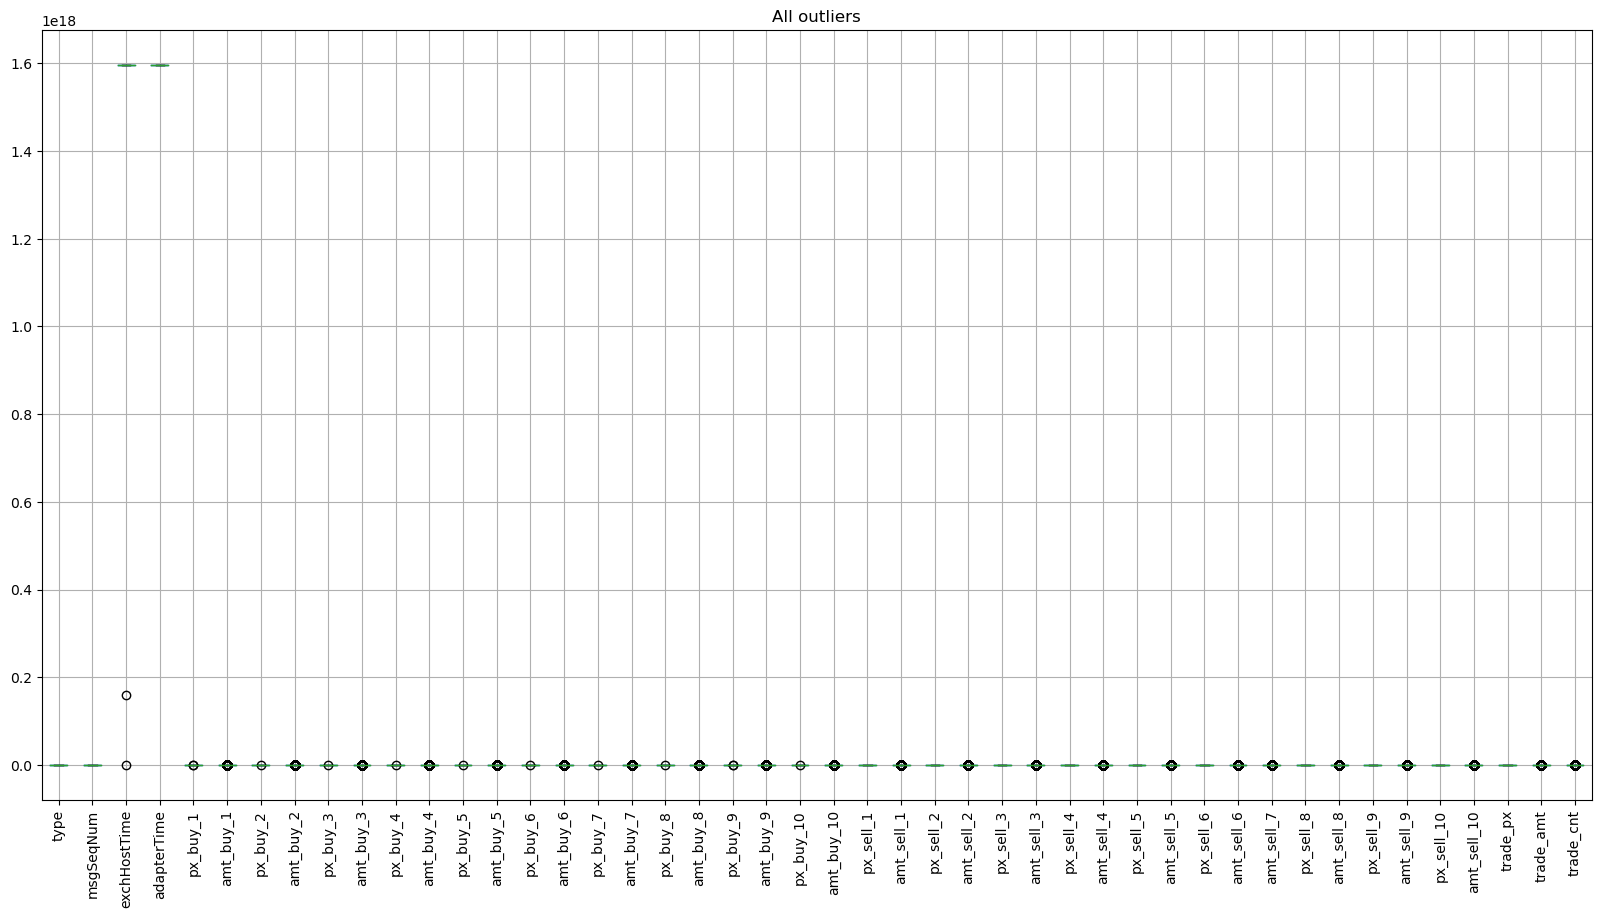

In [32]:
plt.figure(figsize=(20, 10))
df_out_nan_2.select_dtypes(include=[np.number]).boxplot()
plt.xticks(rotation=90)
plt.title('All outliers')
plt.show()

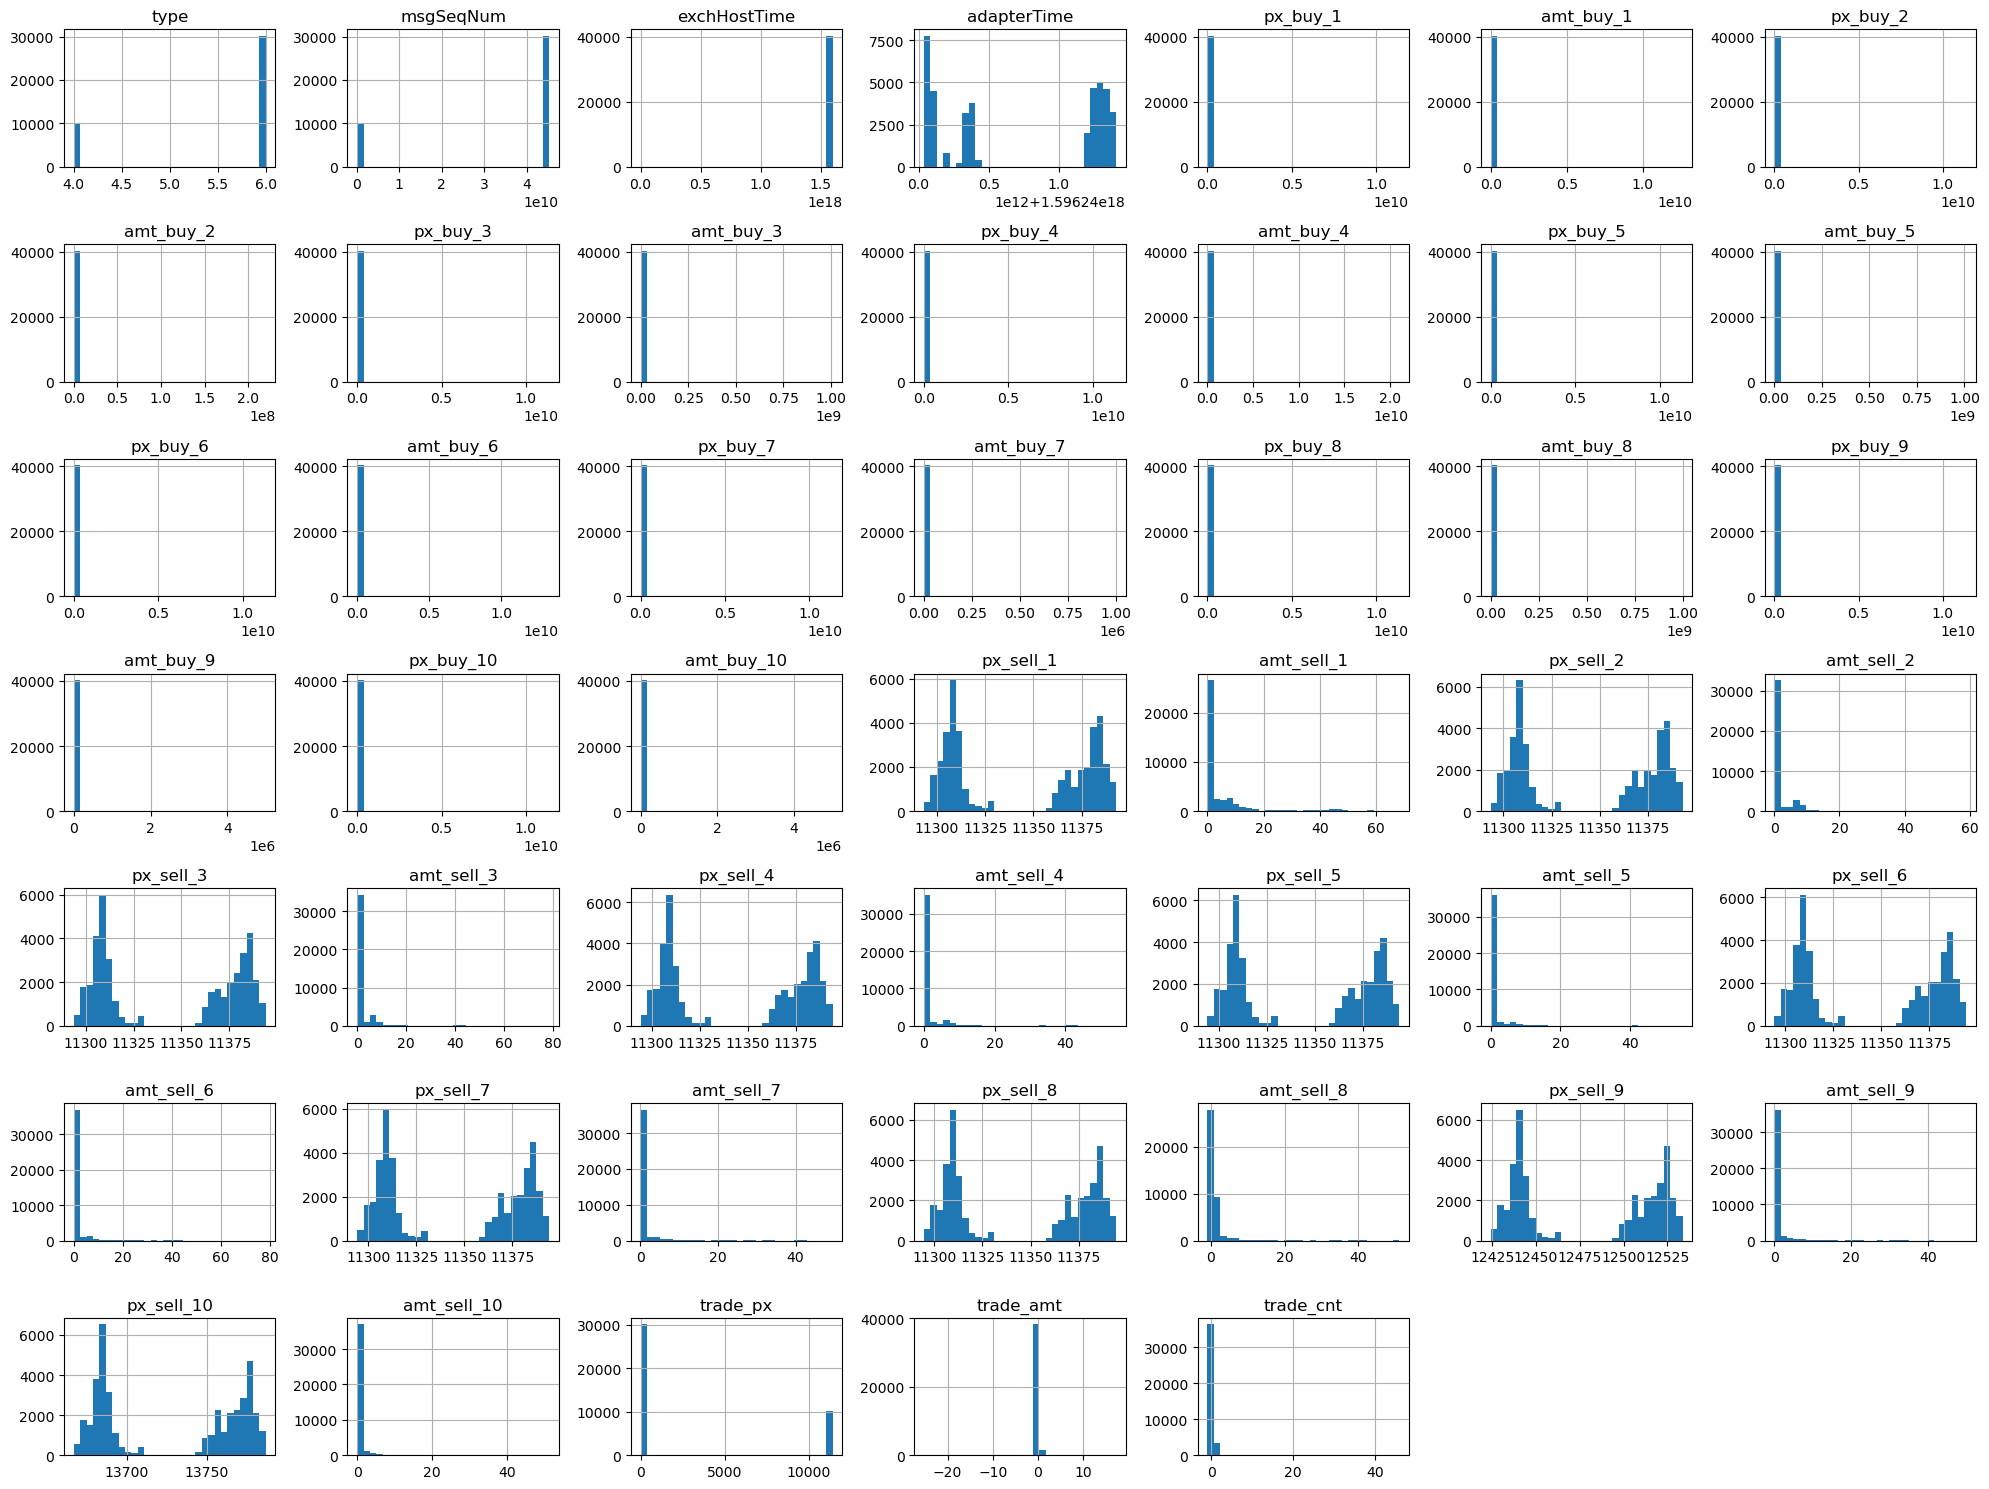

In [38]:
df_out_nan_2.hist(bins=30, figsize=(20, 15))
plt.tight_layout()
plt.show()


z_scores is not suitable because the distribution is not normal.


All meanings: 40273
NaN: 1
Clear: 40272


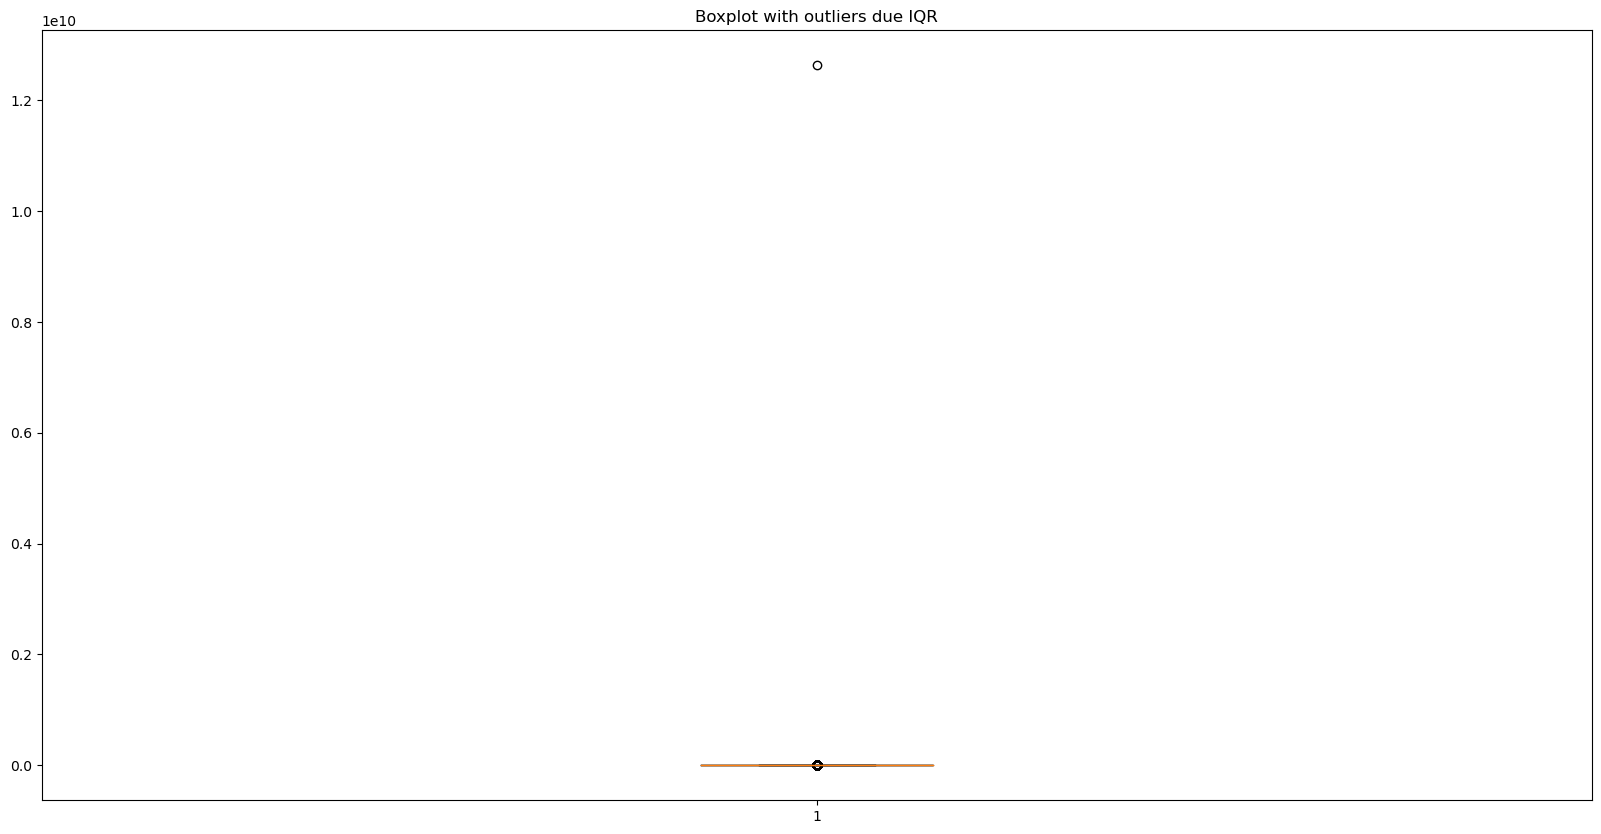

In [33]:
print(f"All meanings: {len(df_out_nan_2['amt_buy_1'])}")
print(f"NaN: {df_out_nan_2['amt_buy_1'].isna().sum()}")

# Удалите NaN перед построением
clean_data = df_out_nan_2['amt_buy_1'].dropna()
print(f"Clear: {len(clean_data)}")

if len(clean_data) > 0:
    plt.figure(figsize=(20, 10))
    plt.boxplot(clean_data)
    plt.title('Boxplot with outliers due IQR')
    plt.show()
else:
    print("No data")

In [34]:
def calculate_outliers_report(df_out_nan_2):
    """Columns with outliers"""
    report = {'error_details': []}
    
    for col in df_out_nan_2.select_dtypes(include=[np.number]).columns:
                   
        Q1 = df_out_nan_2[col].quantile(0.25)
        Q3 = df_out_nan_2[col].quantile(0.75)
        IQR = Q3 - Q1
        
        # Calculating outliers (3*IQR - strict criterion)
        outliers = df_out_nan_2[col][(df_out_nan_2[col] < Q1 - 3*IQR) | (df_out_nan_2[col] > Q3 + 3*IQR)]
        
        if len(outliers) > 0:
            report['error_details'].append({
                'column': col,
                'outliers_count': len(outliers),
                'outliers_percentage': (len(outliers) / len(df_out_nan_2[col].dropna())) * 100,
                'min_outlier': outliers.min(),
                'max_outlier': outliers.max(),
                'Q1': Q1,
                'Q3': Q3,
                'IQR': IQR
            })
    
    return report

# Using
outliers_report = calculate_outliers_report(df_out_nan_2)
print(f"Columns with outliers: {len(outliers_report['error_details'])}")
       


Columns with outliers: 33


In [37]:
def calculate_total_extreme_outliers(df_out_nan_2):
    """extreme outliers(3×IQR)"""
    total_outliers = 0
    
    for col in df_out_nan_2.select_dtypes(include=[np.number]).columns:
        if df_out_nan_2[col].notna().sum() < 10:
            continue
            
        Q1 = df_out_nan_2[col].quantile(0.25)
        Q3 = df_out_nan_2[col].quantile(0.75)
        IQR = Q3 - Q1
        
        outliers = df_out_nan_2[col][(df_out_nan_2[col] < Q1 - 3*IQR) | (df_out_nan_2[col] > Q3 + 3*IQR)]
        total_outliers += len(outliers)
    
    return total_outliers

# Использование
total_extreme_outliers = calculate_total_extreme_outliers(df_out_nan_2)
print(f"Number of extreme outliers (3×IQR): {total_extreme_outliers}")

Number of extreme outliers (3×IQR): 84808


In [38]:
outliers_by_column = {}
for col in df_out_nan_2.select_dtypes(include=[np.number]).columns:
    Q1 = df_out_nan_2[col].quantile(0.25)
    Q3 = df_out_nan_2[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = len(df_out_nan_2[col][(df_out_nan_2[col] < Q1 - 3*IQR) | (df_out_nan_2[col] > Q3 + 3*IQR)])
    outliers_by_column[col] = outliers

# Топ-5 проблемных столбцов
top_columns = sorted(outliers_by_column.items(), key=lambda x: x[1], reverse=True)[:20]
print("Топ-5 columns with outliers:")
for col, count in top_columns:
    print(f"{col}: {count} outliers")

Топ-5 columns with outliers:
trade_amt: 10118 outliers
amt_sell_2: 6538 outliers
amt_sell_3: 5344 outliers
amt_buy_2: 4424 outliers
amt_buy_3: 4263 outliers
amt_sell_4: 4098 outliers
amt_buy_5: 4074 outliers
amt_buy_6: 3975 outliers
trade_cnt: 3931 outliers
amt_buy_4: 3914 outliers
amt_buy_1: 3648 outliers
amt_buy_7: 3510 outliers
amt_sell_5: 3210 outliers
amt_buy_8: 3079 outliers
amt_sell_6: 3051 outliers
amt_sell_1: 2842 outliers
amt_sell_8: 2743 outliers
amt_buy_9: 2699 outliers
amt_sell_7: 2533 outliers
amt_sell_9: 2464 outliers


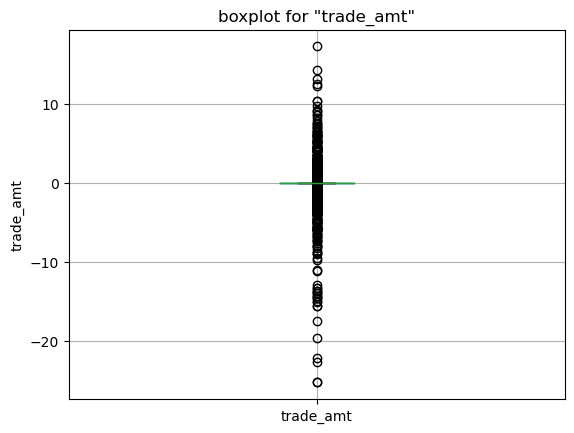

In [39]:
df_out_nan_2.boxplot(column='trade_amt')

plt.title('boxplot for "trade_amt"')
plt.ylabel('trade_amt')
plt.show()

In [40]:
# Outliers in percentage: 84808/1937952 *100, это не так
round(84808/1937952 *100, 2)

4.38

In [45]:
df_out_nan_2.head()


,type,msgSeqNum,exchHostTime,adapterTime,px_buy_1,amt_buy_1,px_buy_2,amt_buy_2,px_buy_3,amt_buy_3,...,amt_sell_7,px_sell_8,amt_sell_8,px_sell_9,amt_sell_9,px_sell_10,amt_sell_10,trade_px,trade_amt,trade_cnt
1000,4,173525833,1596240037000000000,1596240037431704679,11357.99,20.199,11357.67,0.169,11357.5,0.062,...,0.001,11358.82,0.001,12494.7,0.063,13744.17,0.111,11358.25,0.175,0
1001,4,173525834,1596240037000000000,1596240037431749155,11357.99,20.199,11357.67,0.169,11357.5,0.062,...,0.001,11358.82,0.001,12494.7,0.063,13744.17,0.111,11358.26,2.000,0
1002,4,122537841,1596240037000000000,1596240037431776197,11357.99,20.199,11357.67,0.169,11357.5,0.062,...,0.001,11358.82,0.001,12494.7,0.063,13744.17,0.111,11358.25,0.175,1
1003,4,122537842,1596240037000000000,1596240037431782097,11357.99,20.199,11357.67,0.169,11357.5,0.062,...,0.001,11358.82,0.001,12494.7,0.063,13744.17,0.111,11358.26,2.000,1
1004,4,173525835,1596240037000000000,1596240037431794710,11357.99,20.199,11357.67,0.169,11357.5,0.062,...,0.001,11358.82,0.001,12494.7,0.063,13744.17,0.111,11358.33,0.004,0


In [42]:
outliers_by_column1 = {}
for col in df_out_nan_2.select_dtypes(include=[np.number]).columns:
    Q1 = df_out_nan_2[col].quantile(0.25)
    Q3 = df_out_nan_2[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = len(df_out_nan_2[col][(df_out_nan_2[col] < Q1 - 3*IQR) | (df_out_nan_2[col] > Q3 + 3*IQR)])
    outliers_by_column[col] = outliers

# Топ-5 проблемных столбцов
top_columns1 = sorted(outliers_by_column.items(), key=lambda x: x[1], reverse=True)[:22]                                                      
print("Топ-10 columns with outliers:")
for col, count in top_columns1:
    print(f"{col}: {count} outliers")

Топ-10 columns with outliers:
trade_amt: 10118 outliers
amt_sell_2: 6538 outliers
amt_sell_3: 5344 outliers
amt_buy_2: 4424 outliers
amt_buy_3: 4263 outliers
amt_sell_4: 4098 outliers
amt_buy_5: 4074 outliers
amt_buy_6: 3975 outliers
trade_cnt: 3931 outliers
amt_buy_4: 3914 outliers
amt_buy_1: 3648 outliers
amt_buy_7: 3510 outliers
amt_sell_5: 3210 outliers
amt_buy_8: 3079 outliers
amt_sell_6: 3051 outliers
amt_sell_1: 2842 outliers
amt_sell_8: 2743 outliers
amt_buy_9: 2699 outliers
amt_sell_7: 2533 outliers
amt_sell_9: 2464 outliers
amt_buy_10: 2354 outliers
amt_sell_10: 1982 outliers


In [43]:
outliers_by_column = {}
for col in df_out_nan_2.select_dtypes(include=[np.number]).columns:
    Q1 = df_out_nan_2[col].quantile(0.25)
    Q3 = df_out_nan_2[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = len(df_out_nan_2[col][(df_out_nan_2[col] < Q1 - 3*IQR) | (df_out_nan_2[col] > Q3 + 3*IQR)])
    outliers_by_column[col] = outliers


top_columns = sorted(outliers_by_column.items(), key=lambda x: x[1], reverse=True)[:40]                                                      
print("Топ-40 columns with outliers:")
for col, count in top_columns:
    print(f"{col}: {count} outliers")

Топ-40 columns with outliers:
trade_amt: 10118 outliers
amt_sell_2: 6538 outliers
amt_sell_3: 5344 outliers
amt_buy_2: 4424 outliers
amt_buy_3: 4263 outliers
amt_sell_4: 4098 outliers
amt_buy_5: 4074 outliers
amt_buy_6: 3975 outliers
trade_cnt: 3931 outliers
amt_buy_4: 3914 outliers
amt_buy_1: 3648 outliers
amt_buy_7: 3510 outliers
amt_sell_5: 3210 outliers
amt_buy_8: 3079 outliers
amt_sell_6: 3051 outliers
amt_sell_1: 2842 outliers
amt_sell_8: 2743 outliers
amt_buy_9: 2699 outliers
amt_sell_7: 2533 outliers
amt_sell_9: 2464 outliers
amt_buy_10: 2354 outliers
amt_sell_10: 1982 outliers
exchHostTime: 2 outliers
px_buy_1: 2 outliers
px_buy_9: 2 outliers
px_buy_2: 1 outliers
px_buy_3: 1 outliers
px_buy_4: 1 outliers
px_buy_5: 1 outliers
px_buy_6: 1 outliers
px_buy_7: 1 outliers
px_buy_8: 1 outliers
px_buy_10: 1 outliers
type: 0 outliers
msgSeqNum: 0 outliers
adapterTime: 0 outliers
px_sell_1: 0 outliers
px_sell_2: 0 outliers
px_sell_3: 0 outliers
px_sell_4: 0 outliers


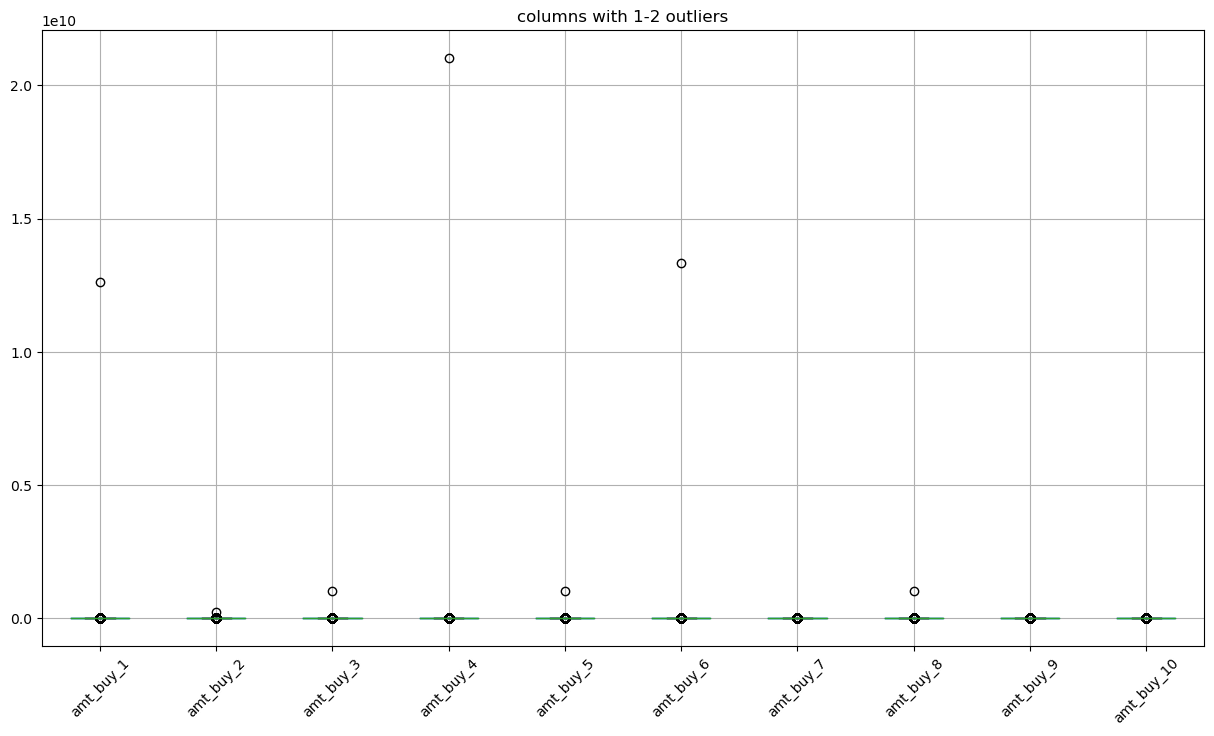

In [44]:
outliers_count = {col: df_out_nan_2[col].isnull().sum() for col in df_out_nan_2.columns}
min_outliers = [col for col, count in outliers_count.items() if 1 <= count <= 2]

plt.figure(figsize=(15, 8))
df_out_nan_2[min_outliers].boxplot()
plt.xticks(rotation=45)
plt.title('columns with 1-2 outliers')
plt.show()

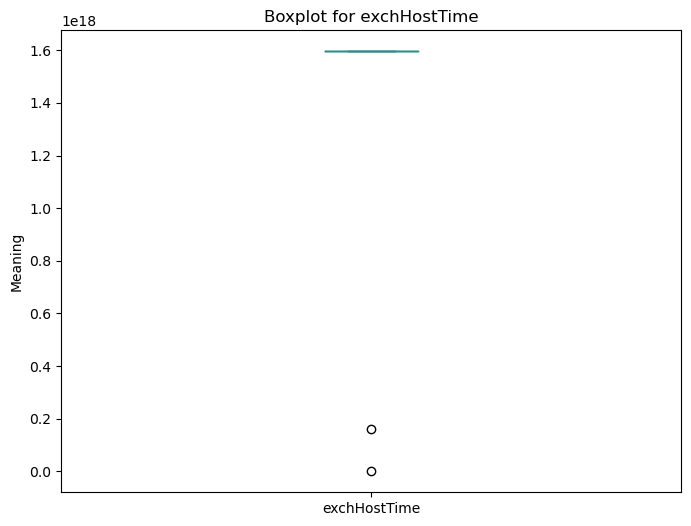

In [45]:
plt.figure(figsize=(8, 6))
df_out_nan_2['exchHostTime'].plot.box()
plt.title('Boxplot for exchHostTime')
plt.ylabel('Meaning')
plt.show()

In [46]:
result = df_out_nan_2['exchHostTime'].min() - df_out_nan_2['exchHostTime'].mean()
result


-1.5961654182241078e+18

In [47]:
Q1 = df_out_nan_2['exchHostTime'].quantile(0.25)
Q3 = df_out_nan_2['exchHostTime'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 3 * IQR
upper_bound = Q3 + 3 * IQR

df_out_outliers_3 = df_out_nan_2[(df_out_nan_2['exchHostTime'] >= lower_bound) & (df_out_nan_2['exchHostTime'] <= upper_bound)]


In [52]:
df_out_outliers_3.shape

(40271, 47)

Error - 2 lines removed - time outliers.

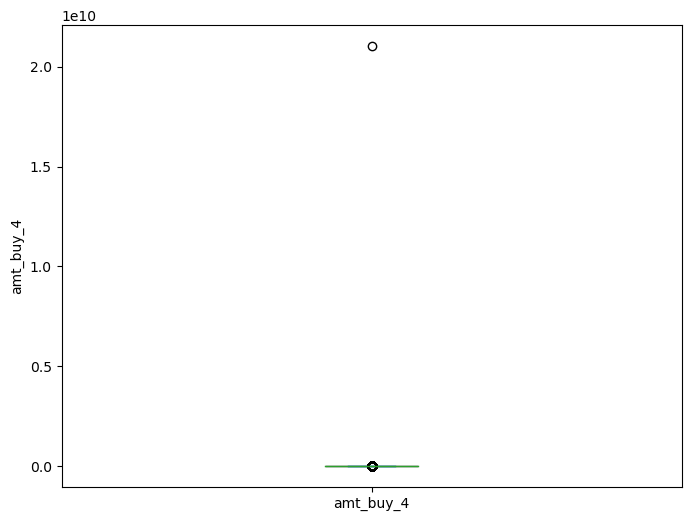

In [48]:
plt.figure(figsize=(8, 6))
df_out_outliers_3['amt_buy_4'].plot.box(
    patch_artist=True,
    boxprops=dict(facecolor='lightgreen')  # только зеленый цвет
)
plt.ylabel('amt_buy_4')
plt.show()

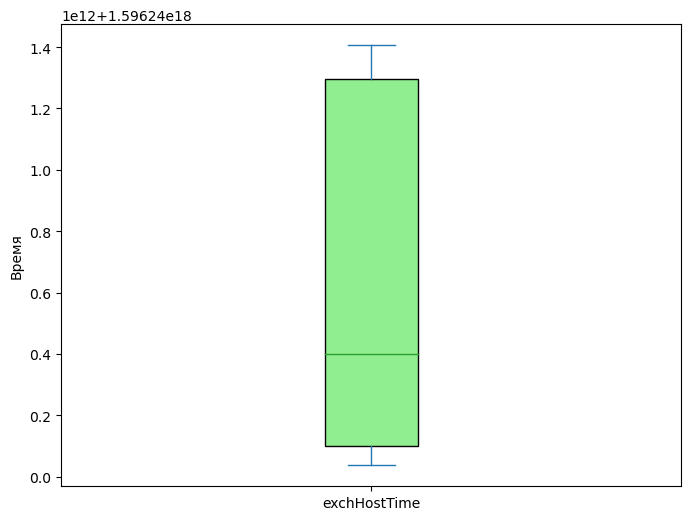

In [49]:
plt.figure(figsize=(8, 6))
df_out_outliers_3['exchHostTime'].plot.box(
    patch_artist=True,
    boxprops=dict(facecolor='lightgreen')  # только зеленый цвет
)
plt.ylabel('Время')
plt.show()

In [50]:
outliers_by_column = {}
for col in df_out_outliers_3.select_dtypes(include=[np.number]).columns:
    Q1 = df_out_outliers_3[col].quantile(0.25)
    Q3 = df_out_outliers_3[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = len(df_out_outliers_3[col][(df_out_outliers_3[col] < Q1 - 3*IQR) | (df_out_outliers_3[col] > Q3 + 3*IQR)])
    outliers_by_column[col] = outliers

# Топ-5 проблемных столбцов
top_columns = sorted(outliers_by_column.items(), key=lambda x: x[1], reverse=True)[:33]                                                      
print("Топ-10 columns with outliers:")
for col, count in top_columns:
    print(f"{col}: {count} outliers")

Топ-10 columns with outliers:
trade_amt: 10118 outliers
amt_sell_2: 6538 outliers
amt_sell_3: 5344 outliers
amt_buy_2: 4424 outliers
amt_buy_3: 4263 outliers
amt_sell_4: 4098 outliers
amt_buy_5: 4074 outliers
amt_buy_6: 3974 outliers
trade_cnt: 3931 outliers
amt_buy_4: 3914 outliers
amt_buy_1: 3647 outliers
amt_buy_7: 3510 outliers
amt_sell_5: 3210 outliers
amt_buy_8: 3079 outliers
amt_sell_6: 3051 outliers
amt_sell_1: 2842 outliers
amt_sell_8: 2742 outliers
amt_buy_9: 2699 outliers
amt_sell_7: 2533 outliers
amt_sell_9: 2464 outliers
amt_buy_10: 2354 outliers
amt_sell_10: 1982 outliers
px_buy_1: 2 outliers
px_buy_9: 2 outliers
px_buy_2: 1 outliers
px_buy_3: 1 outliers
px_buy_4: 1 outliers
px_buy_5: 1 outliers
px_buy_6: 1 outliers
px_buy_7: 1 outliers
px_buy_8: 1 outliers
px_buy_10: 1 outliers
type: 0 outliers


# List to be deleted

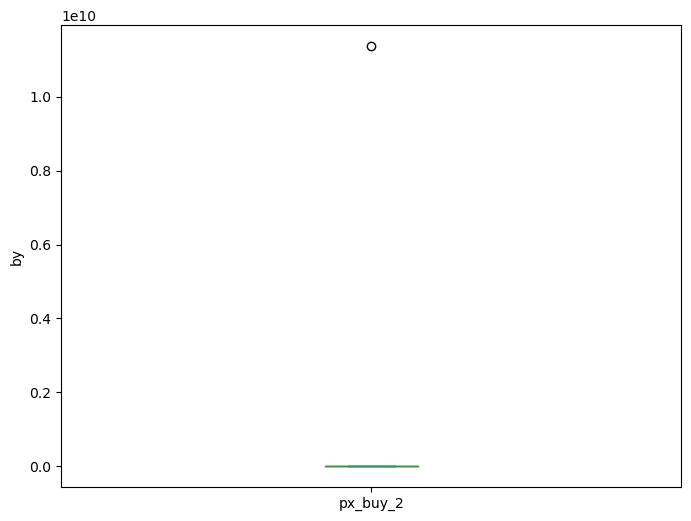

In [51]:
plt.figure(figsize=(8, 6))
df_out_outliers_3['px_buy_2'].plot.box(
    patch_artist=True,
    boxprops=dict(facecolor='lightgreen')  # только зеленый цвет
)
plt.ylabel('by')
plt.show()

In [52]:
mean_value = df_out_outliers_3['px_buy_2'].mean()   
min_value = df_out_outliers_3['px_buy_2'].min()    
max_value = df_out_outliers_3['px_buy_2'].max()
# Разница
difference = mean_value - min_value
difference_m = mean_value - max_value
print("average:", round(mean_value, 3))
print("max:", round(max_value, 3))
print("- min:", round(difference, 3))
print("- max", round(difference_m, 3))

average: 293773.549
max: 11373750000.0
- min: 282480.399
- max -11373456226.451


In [57]:
mean_value = df_out_outliers_3['px_buy_1'].mean()   
min_value = df_out_outliers_3['px_buy_1'].min()    
max_value = df_out_outliers_3['px_buy_1'].max()
# Разница
difference = mean_value - min_value
difference_m = mean_value - max_value
print("AVG:", round(mean_value, 3))
print("min:", round(min_value, 3))
print("max:", round(max_value, 3))
print("-min:", round(difference, 3))
print("- max:", round(difference_m, 3))

AVG: 293779.732
min: 0.0
max: 11374000000.0
-min: 293779.732
- max: -11373706220.268


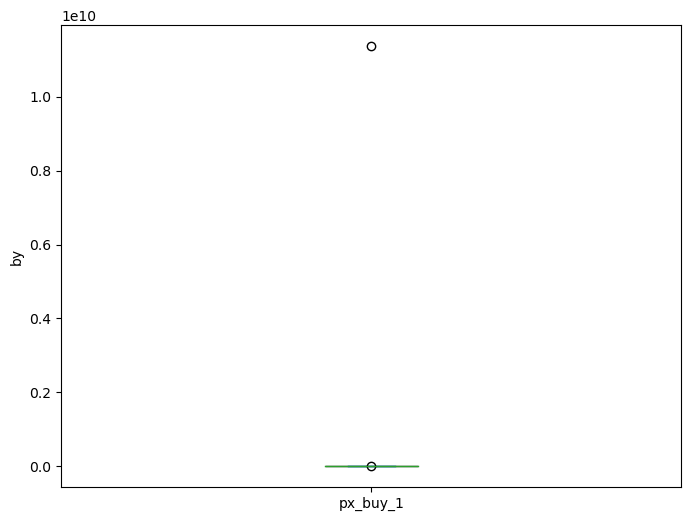

In [55]:
plt.figure(figsize=(8, 6))
df_out_outliers_3['px_buy_1'].plot.box(
    patch_artist=True,
    boxprops=dict(facecolor='lightgreen')  
)
plt.ylabel('by')
plt.show()

In [58]:
mean_value = df_out_outliers_3['amt_buy_1'].mean()   # Среднее
min_value = df_out_outliers_3['amt_buy_1'].min()     # Минимум
max_value = df_out_outliers_3['amt_buy_1'].max()
# Разница
difference = mean_value - min_value
difference_m = mean_value - max_value
print("Среднее:", round(mean_value, 3))
print("Минимум:", round(min_value, 3))
print("Максимум:", round(max_value, 3))
print("Разница с минимум:", round(difference, 3))
print("Разница с макисмумом:", round(difference_m, 3))

Среднее: 313737.563
Минимум: -14.2
Максимум: 12634000000.0
Разница с минимум: 313751.763
Разница с макисмумом: -12633686262.437


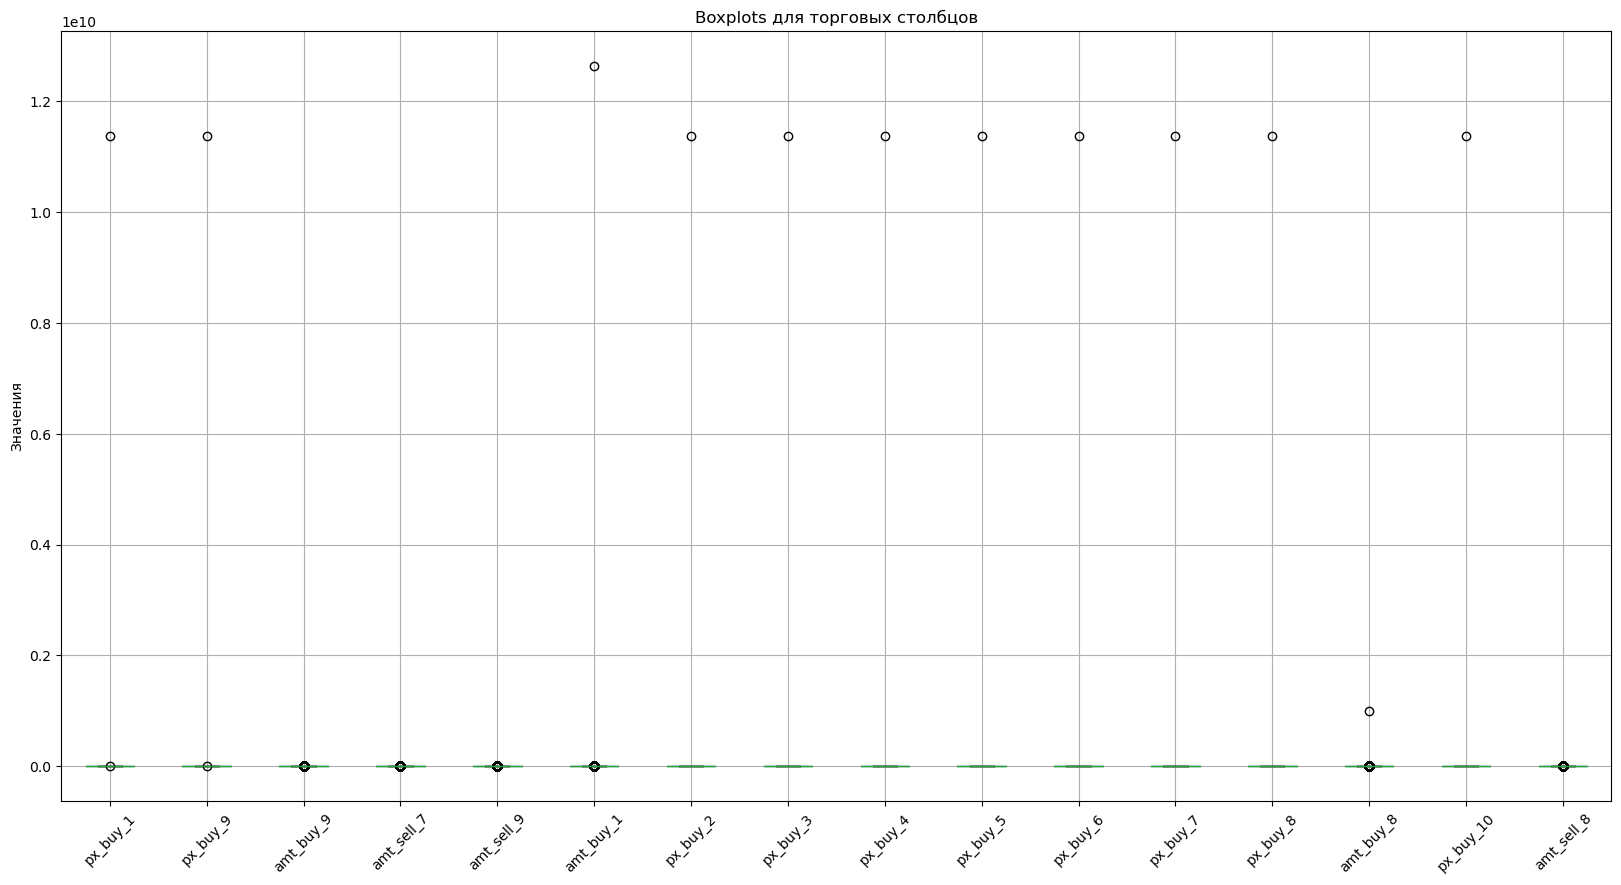

In [59]:
columns_to_plot = ['px_buy_1', 'px_buy_9', 'amt_buy_9', 'amt_sell_7', 'amt_sell_9', 
                   'amt_buy_1', 'px_buy_2', 'px_buy_3', 'px_buy_4', 'px_buy_5', 
                   'px_buy_6', 'px_buy_7', 'px_buy_8', 'amt_buy_8', 'px_buy_10', 'amt_sell_8']

plt.figure(figsize=(20, 10))
df_out_outliers_3[columns_to_plot].boxplot(patch_artist=True)
plt.xticks(rotation=45)
plt.title('Boxplots для торговых столбцов')
plt.ylabel('Значения')
plt.show()

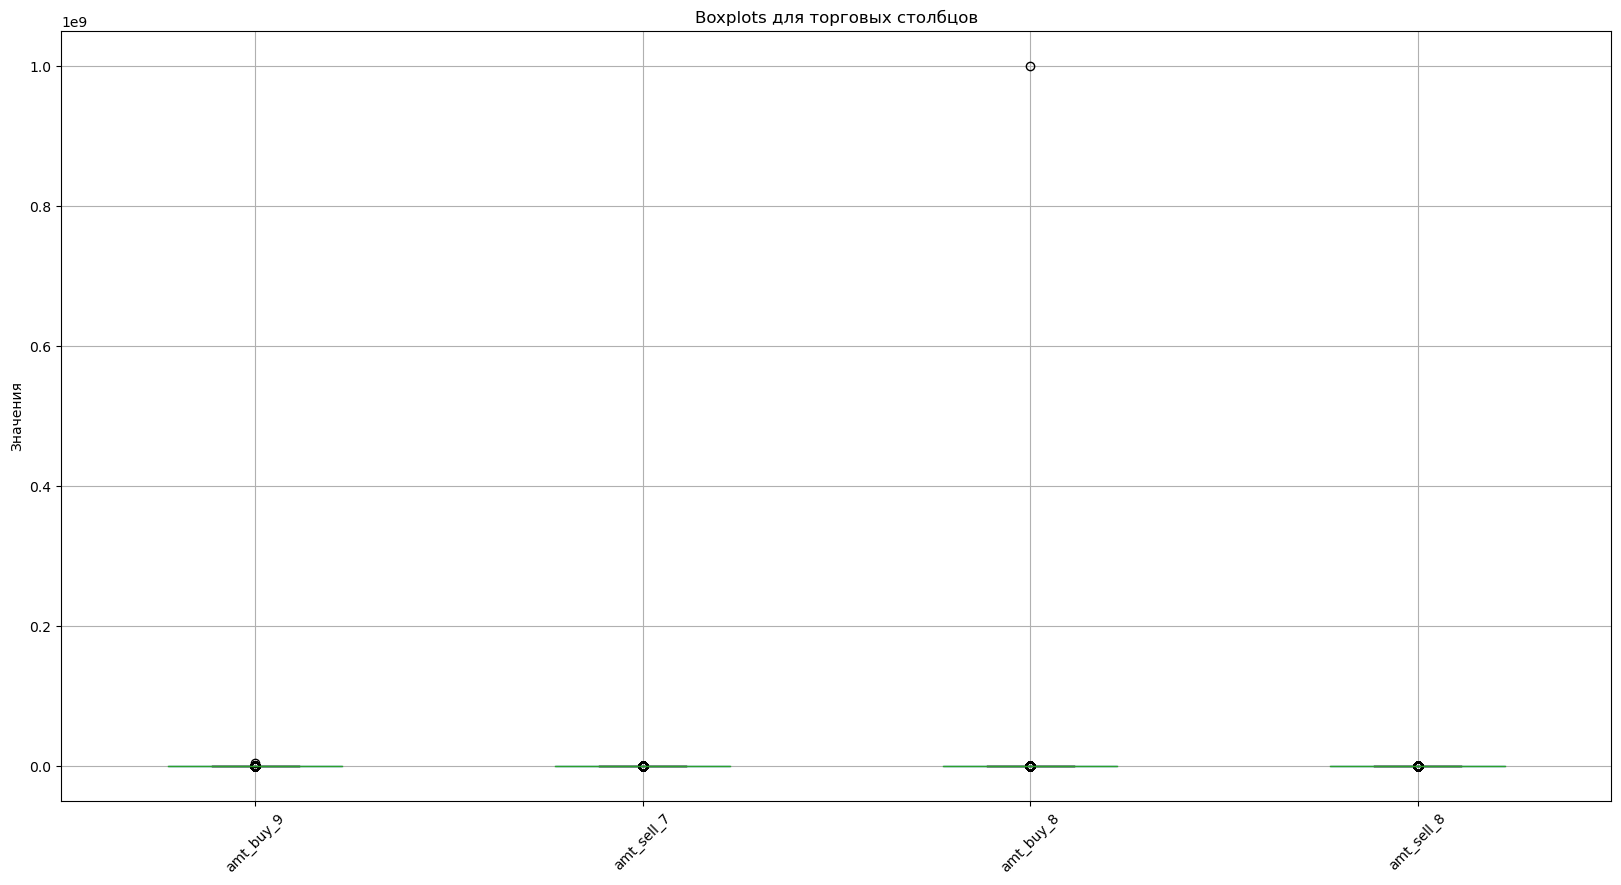

In [64]:
columns_to_plot = ['amt_buy_9', 'amt_sell_7',  
                   'amt_buy_8', 'amt_sell_8']

plt.figure(figsize=(20, 10))
df_out_outliers_3[columns_to_plot].boxplot(patch_artist=True)
plt.xticks(rotation=45)
plt.title('Boxplots для торговых столбцов')
plt.ylabel('Значения')
plt.show()

In [65]:
mean_value = df_out_outliers_3['amt_buy_8'].mean()   # Среднее
min_value = df_out_outliers_3['amt_buy_8'].min()     # Минимум
max_value = df_out_outliers_3['amt_buy_8'].max()
# Разница
difference = mean_value - min_value
difference_m = mean_value - max_value
print("Среднее:", round(mean_value, 3))
print("Минимум:", round(min_value, 3))
print("Максимум:", round(max_value, 3))
print("Разница с минимум:", round(difference, 3))
print("Разница с макисмумом:", round(difference_m, 3))

Среднее: 24833.541
Минимум: -1.99
Максимум: 1000000000.0
Разница с минимум: 24835.531
Разница с макисмумом: -999975166.459


In [66]:
mean_value = df_out_outliers_3['amt_buy_9'].mean()   # Среднее
min_value = df_out_outliers_3['amt_buy_9'].min()     # Минимум
max_value = df_out_outliers_3['amt_buy_9'].max()
# Разница
difference = mean_value - min_value
difference_m = mean_value - max_value
print("Среднее:", round(mean_value, 3))
print("Минимум:", round(min_value, 3))
print("Максимум:", round(max_value, 3))
print("Разница с минимум:", round(difference, 3))
print("Разница с макисмумом:", round(difference_m, 3))

Среднее: 125.166
Минимум: -3.0
Максимум: 5000000.0
Разница с минимум: 128.166
Разница с макисмумом: -4999874.834


In [67]:
mean_value = df_out_outliers_3['amt_sell_8'].mean()   # Среднее
min_value = df_out_outliers_3['amt_sell_8'].min()     # Минимум
max_value = df_out_outliers_3['amt_sell_8'].max()
# Разница
difference = mean_value - min_value
difference_m = mean_value - max_value
print("Среднее:", round(mean_value, 3))
print("Минимум:", round(min_value, 3))
print("Максимум:", round(max_value, 3))
print("Разница с минимум:", round(difference, 3))
print("Разница с макисмумом:", round(difference_m, 3))

Среднее: 1.135
Минимум: -1.0
Максимум: 51.244
Разница с минимум: 2.135
Разница с макисмумом: -50.109


Удялим строки, данные в которых выходят за перделы 50 IORи разница сос редним составляет десятки миллиардов px_buy_1', 'px_buy_9', 'amt_buy_1', 'px_buy_2',
    'px_buy_3', 'px_buy_4', 'px_buy_5', 'px_buy_6', 'px_buy_7',
    'px_buy_8', 'px_buy_10'. ДАнные столбце amt_by8 оставим. РАзница там составляет миллиард

In [68]:
columns_to_check = [
    'px_buy_1', 'px_buy_9', 'amt_buy_1', 'px_buy_2',
    'px_buy_3', 'px_buy_4', 'px_buy_5', 'px_buy_6', 'px_buy_7',
    'px_buy_8', 'px_buy_10', 'amt_buy_8'
]

# Создаем маску для строк, которые нужно удалить
mask = pd.Series(False, index=df_out_outliers_3.index)

for column in columns_to_check:
    if column in df_out_outliers_3.columns:
        max_value = df_out_outliers_3[column].max()
        # Добавляем в маску строки с максимальным значением в текущем столбце
        mask = mask | (df_out_outliers_3[column] == max_value)

# Удаляем строки, где есть хотя бы одно максимальное значение
df_clean = df_out_outliers_3[~mask]

print(f"Было строк: {len(df_out_outliers_3)}")
print(f"Удалено строк с максимумами: {mask.sum()}")
print(f"Осталось строк: {len(df_clean)}")

Было строк: 40271
Удалено строк с максимумами: 2
Осталось строк: 40269


Првоерка удаления. В итоге удалено вего две строки.

In [69]:
for column in columns_to_check:
    if column in df_clean.columns:
        original_max = df_out_outliers_3[column].max()
        new_max = df_clean[column].max()
        print(f"{column}: было {original_max}, стало {new_max}")

px_buy_1: было 11374000000.0, стало 11392.79
px_buy_9: было 11372360000.0, стало 11392.01
amt_buy_1: было 12634000000.0, стало 67.935
px_buy_2: было 11373750000.0, стало 11392.76
px_buy_3: было 11373420000.0, стало 11392.75
px_buy_4: было 11373350000.0, стало 11392.74
px_buy_5: было 11373010000.0, стало 11392.52
px_buy_6: было 11373000000.0, стало 11392.08
px_buy_7: было 11372610000.0, стало 11392.06
px_buy_8: было 11372410000.0, стало 11392.04
px_buy_10: было 11372280000.0, стало 11391.97
amt_buy_8: было 1000000000.0, стало 49.498


In [70]:
df_out_outliers_4 = df_clean

Удалим минимумы в 2 столбцах 'px_buy_1', 'px_buy_9'

In [71]:
columns_to_check_1 = [
    'px_buy_1', 'px_buy_9'
]

# Создаем маску для строк, которые нужно удалить
mask = pd.Series(False, index=df_out_outliers_4.index)

for column in columns_to_check_1:
    if column in df_out_outliers_4.columns:
        max_value = df_out_outliers_4[column].min()
        # Добавляем в маску строки с максимальным значением в текущем столбце
        mask = mask | (df_out_outliers_4[column] == max_value)

# Удаляем строки, где есть хотя бы одно минимальное значение
df_clean_1 = df_out_outliers_4[~mask]

print(f"Было строк: {len(df_out_outliers_4)}")
print(f"Удалено строк с минимумами: {mask.sum()}")
print(f"Осталось строк: {len(df_clean_1)}")

Было строк: 40269
Удалено строк с минимумами: 2
Осталось строк: 40267


проверка

In [72]:
for column in columns_to_check_1:
    if column in df_clean_1.columns:
        original_max = df_out_outliers_4[column].min()
        new_max = df_clean_1[column].min()
        print(f"{column}: было {original_max}, стало {new_max}")

px_buy_1: было 0.0, стало 11293.2
px_buy_9: было -11384.15, стало 11292.83


In [73]:
df_out_outliers_5 = df_clean_1

In [74]:
outliers_by_column = {}
for col in df_out_outliers_5.select_dtypes(include=[np.number]).columns:
    Q1 = df_out_outliers_5[col].quantile(0.25)
    Q3 = df_out_outliers_5[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = len(df_out_outliers_5[col][(df_out_outliers_5[col] < Q1 - 50*IQR) | (df_out_outliers_5[col] > Q3 + 50*IQR)])
    outliers_by_column[col] = outliers

# Топ-5 проблемных столбцов
top_columns = sorted(outliers_by_column.items(), key=lambda x: x[1], reverse=True)[:20]                                                     
print("Топ-10 столбцов по выбросам:")
for col, count in top_columns:
    print(f"{col}: {count} выбросов")

Топ-10 столбцов по выбросам:
trade_amt: 10118 выбросов
trade_cnt: 3931 выбросов
amt_sell_4: 35 выбросов
amt_sell_3: 29 выбросов
amt_buy_2: 25 выбросов
amt_buy_3: 25 выбросов
amt_buy_4: 19 выбросов
amt_sell_2: 15 выбросов
amt_sell_5: 15 выбросов
amt_sell_10: 15 выбросов
amt_buy_5: 14 выбросов
amt_sell_6: 13 выбросов
amt_buy_6: 9 выбросов
amt_buy_10: 6 выбросов
amt_buy_7: 3 выбросов
amt_sell_7: 2 выбросов
amt_sell_9: 2 выбросов
amt_buy_9: 1 выбросов
amt_sell_8: 1 выбросов
type: 0 выбросов


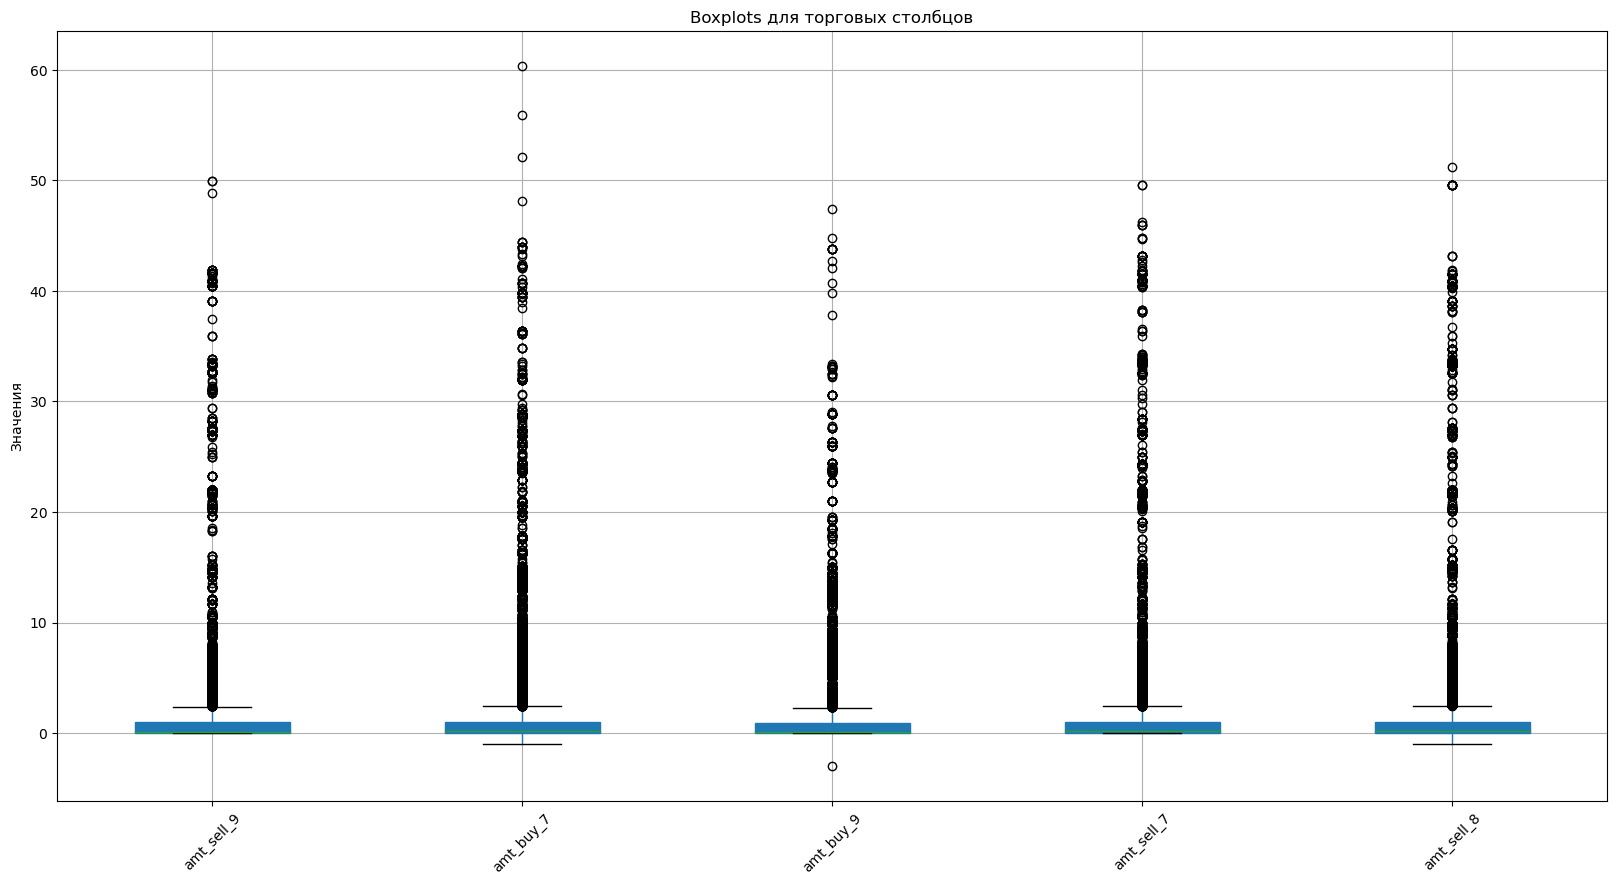

In [75]:
columns_to_plot = ['amt_sell_9', 'amt_buy_7', 
                   'amt_buy_9', 'amt_sell_7',  
                   'amt_sell_8']

plt.figure(figsize=(20, 10))
df_out_outliers_5[columns_to_plot].boxplot(patch_artist=True)
plt.xticks(rotation=45)
plt.title('Boxplots для торговых столбцов')
plt.ylabel('Значения')
plt.show()

Все нормально

Еще проверка

In [76]:
mean_value = df_out_outliers_5['amt_buy_7'].mean()   # Среднее
min_value = df_out_outliers_5['amt_buy_7'].min()     # Минимум
max_value = df_out_outliers_5['amt_buy_7'].max()
# Разница
difference = mean_value - min_value
difference_m = mean_value - max_value
print("Среднее:", round(mean_value, 3))
print("Минимум:", round(min_value, 3))
print("Максимум:", round(max_value, 3))
print("Разница с минимум:", round(difference, 3))
print("Разница с макисмумом:", round(difference_m, 3))

Среднее: 1.367
Минимум: -1.007
Максимум: 60.319
Разница с минимум: 2.374
Разница с макисмумом: -58.952


Распределение

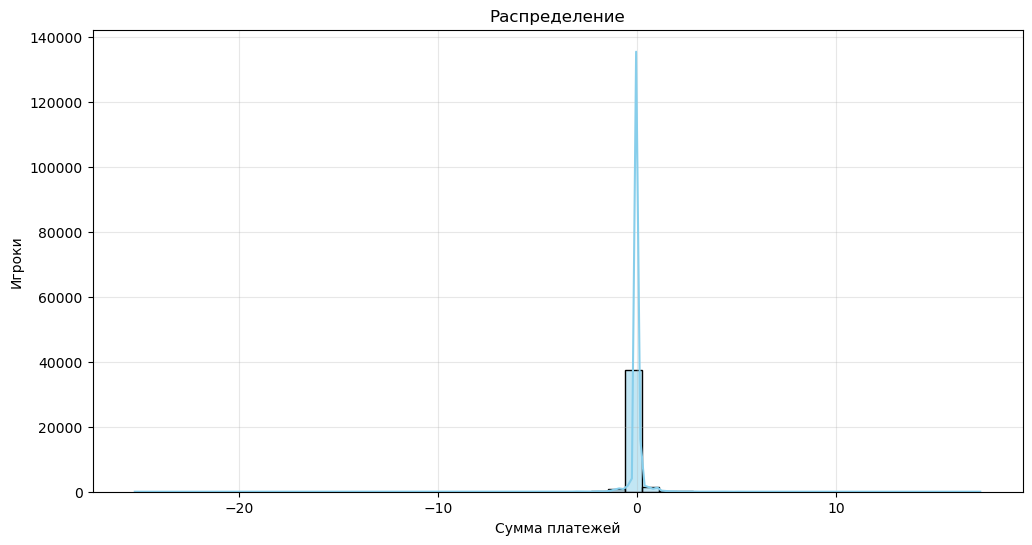

In [77]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df_out_outliers_3, x='trade_amt', kde=True, bins=50, color='skyblue')
plt.title('Распределение')
plt.xlabel('Сумма платежей')
plt.ylabel('Игроки')
plt.grid(alpha=0.3)
plt.show()

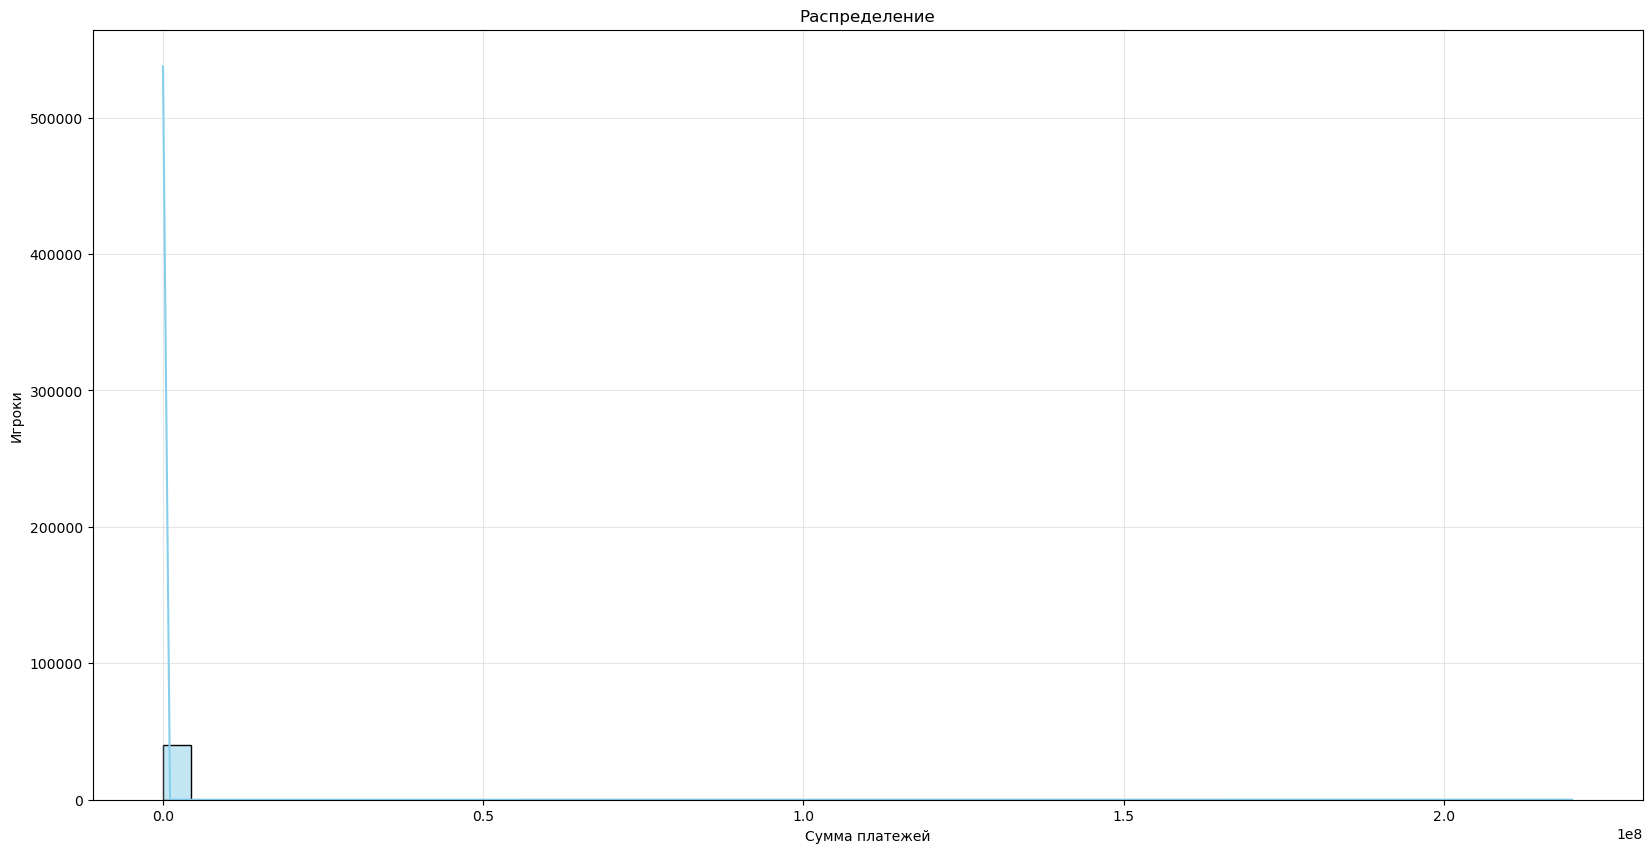

In [78]:
plt.figure(figsize=(20, 10))
sns.histplot(data=df_out_outliers_3, x='amt_buy_2', kde=True, bins=50, color='skyblue')
plt.title('Распределение')
plt.xlabel('Сумма платежей')
plt.ylabel('Игроки')
plt.grid(alpha=0.3)
plt.show()

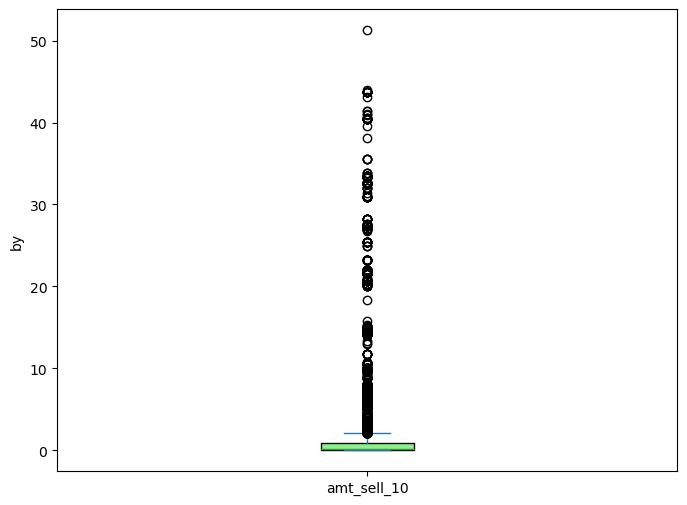

In [79]:
plt.figure(figsize=(8, 6))
df_out_outliers_3['amt_sell_10'].plot.box(
    patch_artist=True,
    boxprops=dict(facecolor='lightgreen')  # только зеленый цвет
)
plt.ylabel('by')
plt.show()

In [80]:
df_out_outliers_3.amt_sell_8.tail(10)

41364     0.002
41365    22.000
41366    22.000
41367    22.000
41368    22.000
41369    22.000
41370     0.449
41371     0.449
41372     0.449
41373     0.449
Name: amt_sell_8, dtype: float64

In [81]:
mean_value = df_out_outliers_3['amt_buy_1'].mean()   # Среднее
min_value = df_out_outliers_3['amt_buy_1'].min()     # Минимум
max_value = df_out_outliers_3['amt_buy_1'].max()
# Разница
difference = mean_value - min_value
difference_m = mean_value - max_value
print("Среднее:", round(mean_value, 3))
print("Минимум:", round(min_value, 3))
print("Максимум:", round(max_value, 3))
print("Разница с минимум:", round(difference, 3))
print("Разница с макисмумом:", round(difference_m, 3))

Среднее: 313737.563
Минимум: -14.2
Максимум: 12634000000.0
Разница с минимум: 313751.763
Разница с макисмумом: -12633686262.437


In [82]:
df_out_outliers_3

,type,msgSeqNum,exchHostTime,adapterTime,px_buy_1,amt_buy_1,px_buy_2,amt_buy_2,px_buy_3,amt_buy_3,...,amt_sell_7,px_sell_8,amt_sell_8,px_sell_9,amt_sell_9,px_sell_10,amt_sell_10,trade_px,trade_amt,trade_cnt
1000,4,173525833,1596240037000000000,1596240037431704679,11357.99,20.199,11357.67,0.169,11357.50,0.062,...,0.001,11358.82,0.001,12494.70,0.063,13744.17,0.111,11358.25,0.175,0
1001,4,173525834,1596240037000000000,1596240037431749155,11357.99,20.199,11357.67,0.169,11357.50,0.062,...,0.001,11358.82,0.001,12494.70,0.063,13744.17,0.111,11358.26,2.000,0
1002,4,122537841,1596240037000000000,1596240037431776197,11357.99,20.199,11357.67,0.169,11357.50,0.062,...,0.001,11358.82,0.001,12494.70,0.063,13744.17,0.111,11358.25,0.175,1
1003,4,122537842,1596240037000000000,1596240037431782097,11357.99,20.199,11357.67,0.169,11357.50,0.062,...,0.001,11358.82,0.001,12494.70,0.063,13744.17,0.111,11358.26,2.000,1
1004,4,173525835,1596240037000000000,1596240037431794710,11357.99,20.199,11357.67,0.169,11357.50,0.062,...,0.001,11358.82,0.001,12494.70,0.063,13744.17,0.111,11358.33,0.004,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41369,6,45258026841,1596241406000000000,1596241406563025313,11308.23,0.480,11307.86,1.009,11307.85,0.240,...,0.002,11309.87,22.000,12440.86,0.449,13684.95,1.004,0.00,0.000,0
41370,6,45258026853,1596241406000000000,1596241406565277457,11308.23,6.480,11307.86,1.009,11307.85,0.240,...,22.000,11309.90,0.449,12440.89,1.004,13684.98,5.265,0.00,0.000,0
41371,6,45258026878,1596241406000000000,1596241406567760680,11308.23,6.480,11307.85,0.240,11307.84,8.250,...,22.000,11309.90,0.449,12440.89,1.004,13684.98,5.265,0.00,0.000,0
41372,6,45258026892,1596241406000000000,1596241406570122673,11308.23,0.480,11307.85,0.240,11307.84,8.250,...,22.000,11309.90,0.449,12440.89,1.004,13684.98,5.265,0.00,0.000,0


In [83]:
Q1 = df_out_outliers_3.quantile(0.25)
Q3 = df_out_outliers_3.quantile(0.75)
IQR = Q3 - Q1
outliers = ((df_out_outliers_3 < (Q1 - 1.5 * IQR)) | (df_out_outliers_3 > (Q3 + 1.5 * IQR)))


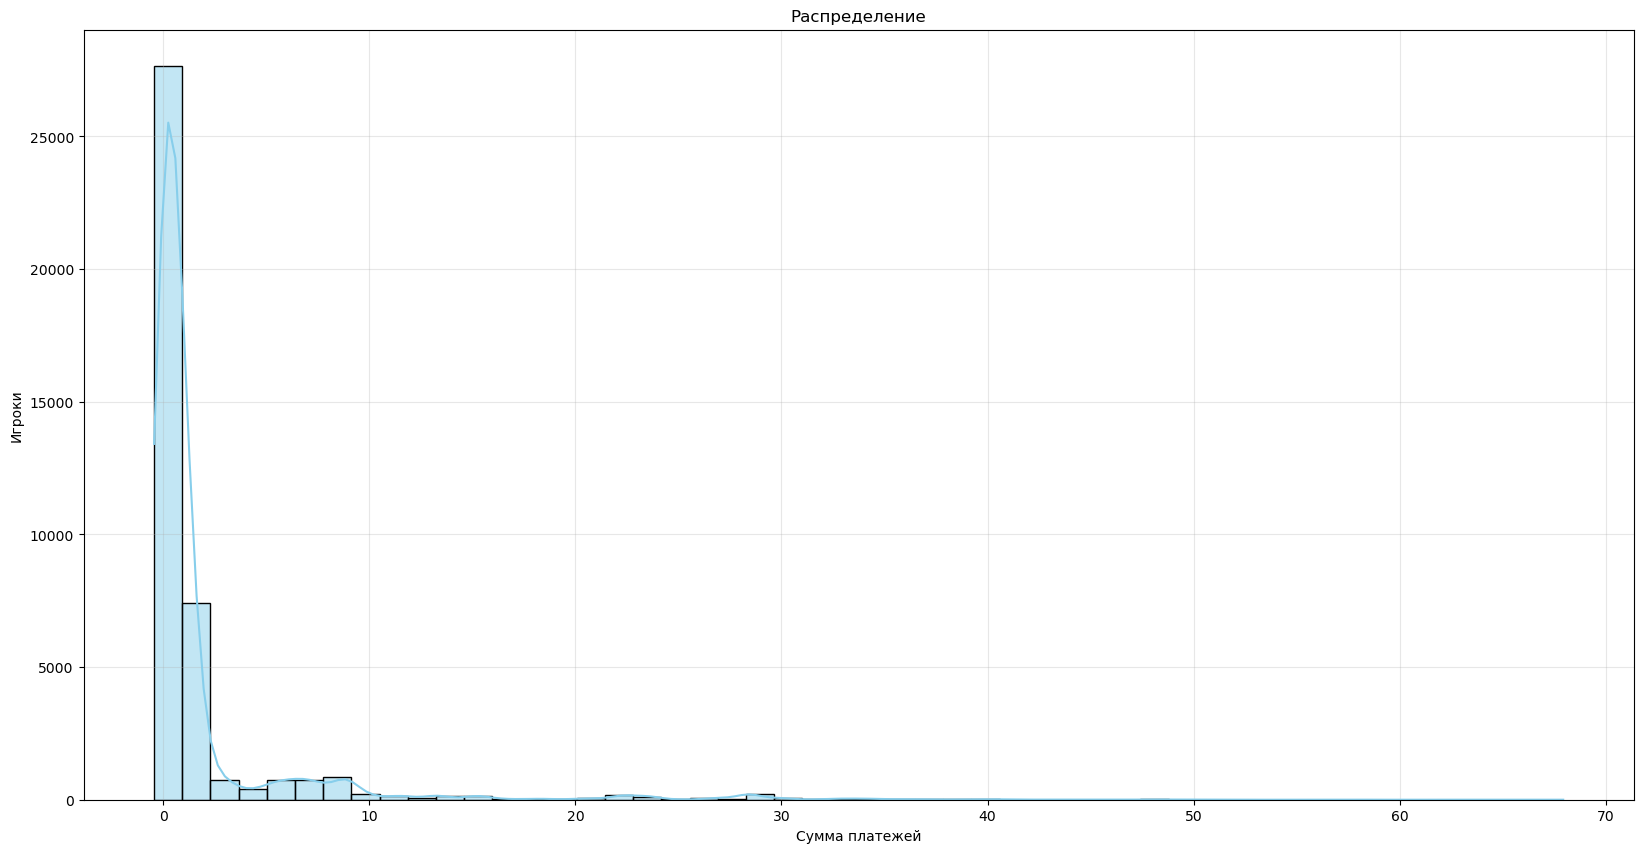

In [84]:
plt.figure(figsize=(20, 10))
sns.histplot(data=df_out_outliers_5, x='amt_buy_2', kde=True, bins=50, color='skyblue')
plt.title('Распределение')
plt.xlabel('Сумма платежей')
plt.ylabel('Игроки')
plt.grid(alpha=0.3)
plt.show()

Если значения не могут быть отрицательные в колнках By  и sell

In [89]:
columns_to_check_3 = [
    'px_buy_1', 'amt_buy_1', 'px_buy_2', 'amt_buy_2', 'px_buy_3', 'amt_buy_3',
    'px_buy_4', 'amt_buy_4', 'px_buy_5', 'amt_buy_5', 'px_buy_6', 'amt_buy_6',
    'px_buy_7', 'amt_buy_7', 'px_buy_8', 'amt_buy_8', 'px_buy_9', 'amt_buy_9',
    'px_buy_10', 'amt_buy_10', 'px_sell_1', 'amt_sell_1', 'px_sell_2', 'amt_sell_2',
    'px_sell_3', 'amt_sell_3', 'px_sell_4', 'amt_sell_4', 'px_sell_5', 'amt_sell_5',
    'px_sell_6', 'amt_sell_6', 'px_sell_7', 'amt_sell_7', 'px_sell_8', 'amt_sell_8',
    'px_sell_9', 'amt_sell_9', 'px_sell_10', 'amt_sell_10'
]

# Подсчет отрицательных значений в указанных столбцах
negative_counts = (df_out_outliers_5[columns_to_check_3] < 0).sum()

# Вывод результатов
print("Количество отрицательных значений в стакане:")
for column, count in negative_counts.items():
    if count > 0:
        print(f"  {column}: {count} отрицательных значений")
    else:
        print(f" {column}: 0 отрицательных значений")

# Общая статистика
total_negative = negative_counts.sum()
print(f"\nВсего отрицательных значений в стакане: {total_negative}")

# Столбцы с проблемами
problem_columns = negative_counts[negative_counts > 0]
if len(problem_columns) > 0:
    print(f"\nПроблемные столбцы: {list(problem_columns.index)}")
else:
    print("\nВсе данные в стакане корректны!")

Количество отрицательных значений в стакане:
 px_buy_1: 0 отрицательных значений
  amt_buy_1: 1 отрицательных значений
 px_buy_2: 0 отрицательных значений
  amt_buy_2: 1 отрицательных значений
 px_buy_3: 0 отрицательных значений
  amt_buy_3: 1 отрицательных значений
 px_buy_4: 0 отрицательных значений
  amt_buy_4: 1 отрицательных значений
 px_buy_5: 0 отрицательных значений
  amt_buy_5: 1 отрицательных значений
 px_buy_6: 0 отрицательных значений
  amt_buy_6: 1 отрицательных значений
 px_buy_7: 0 отрицательных значений
  amt_buy_7: 1 отрицательных значений
 px_buy_8: 0 отрицательных значений
  amt_buy_8: 1 отрицательных значений
 px_buy_9: 0 отрицательных значений
  amt_buy_9: 1 отрицательных значений
 px_buy_10: 0 отрицательных значений
  amt_buy_10: 1 отрицательных значений
 px_sell_1: 0 отрицательных значений
 amt_sell_1: 0 отрицательных значений
 px_sell_2: 0 отрицательных значений
 amt_sell_2: 0 отрицательных значений
 px_sell_3: 0 отрицательных значений
 amt_sell_3: 0 отрицательн

In [90]:
columns_to_check_3 = [
    'px_buy_1', 'amt_buy_1', 'px_buy_2', 'amt_buy_2', 'px_buy_3', 'amt_buy_3',
    'px_buy_4', 'amt_buy_4', 'px_buy_5', 'amt_buy_5', 'px_buy_6', 'amt_buy_6',
    'px_buy_7', 'amt_buy_7', 'px_buy_8', 'amt_buy_8', 'px_buy_9', 'amt_buy_9',
    'px_buy_10', 'amt_buy_10', 'px_sell_1', 'amt_sell_1', 'px_sell_2', 'amt_sell_2',
    'px_sell_3', 'amt_sell_3', 'px_sell_4', 'amt_sell_4', 'px_sell_5', 'amt_sell_5',
    'px_sell_6', 'amt_sell_6', 'px_sell_7', 'amt_sell_7', 'px_sell_8', 'amt_sell_8',
    'px_sell_9', 'amt_sell_9', 'px_sell_10', 'amt_sell_10'
]

# Подсчет отрицательных значений в указанных столбцах
negative_counts = (df_out_outliers_5[columns_to_check_3] < 0).sum()

# Вывод результатов
print("Количество отрицательных значений в стакане:")
for column, count in negative_counts.items():
    if count > 0:
        print(f"  {column}: {count} отрицательных значений")
    else:
        print(f" {column}: 0 отрицательных значений")

# Общая статистика
total_negative = negative_counts.sum()
print(f"\n Всего отрицательных значений в стакане: {total_negative}")

# Столбцы с проблемами
problem_columns = negative_counts[negative_counts > 0]
if len(problem_columns) > 0:
    print(f"\n Проблемные столбцы: {list(problem_columns.index)}")
else:
    print(f"\n Все данные в стакане корректны!")

Количество отрицательных значений в стакане:
 px_buy_1: 0 отрицательных значений
  amt_buy_1: 1 отрицательных значений
 px_buy_2: 0 отрицательных значений
  amt_buy_2: 1 отрицательных значений
 px_buy_3: 0 отрицательных значений
  amt_buy_3: 1 отрицательных значений
 px_buy_4: 0 отрицательных значений
  amt_buy_4: 1 отрицательных значений
 px_buy_5: 0 отрицательных значений
  amt_buy_5: 1 отрицательных значений
 px_buy_6: 0 отрицательных значений
  amt_buy_6: 1 отрицательных значений
 px_buy_7: 0 отрицательных значений
  amt_buy_7: 1 отрицательных значений
 px_buy_8: 0 отрицательных значений
  amt_buy_8: 1 отрицательных значений
 px_buy_9: 0 отрицательных значений
  amt_buy_9: 1 отрицательных значений
 px_buy_10: 0 отрицательных значений
  amt_buy_10: 1 отрицательных значений
 px_sell_1: 0 отрицательных значений
 amt_sell_1: 0 отрицательных значений
 px_sell_2: 0 отрицательных значений
 amt_sell_2: 0 отрицательных значений
 px_sell_3: 0 отрицательных значений
 amt_sell_3: 0 отрицательн

### Отрицательные значения

In [91]:
negative_columns = [
    'amt_buy_1', 'amt_buy_2', 'amt_buy_3', 'amt_buy_4', 'amt_buy_5', 
    'amt_buy_6', 'amt_buy_7', 'amt_buy_8', 'amt_buy_9', 'amt_buy_10', 'amt_sell_8'
]

#  строки с отрицательными значениями
negative_mask = (df_out_outliers_5[negative_columns] < 0).any(axis=1)
negative_rows_df = df_out_outliers_5[negative_mask]

print(f"Найдено строк с отрицательными значениями: {len(negative_rows_df)}")
print("\nСтроки с отрицательными значениями:")
display(negative_rows_df)  # для Jupyter Notebook



Найдено строк с отрицательными значениями: 2

Строки с отрицательными значениями:


,type,msgSeqNum,exchHostTime,adapterTime,px_buy_1,amt_buy_1,px_buy_2,amt_buy_2,px_buy_3,amt_buy_3,...,amt_sell_7,px_sell_8,amt_sell_8,px_sell_9,amt_sell_9,px_sell_10,amt_sell_10,trade_px,trade_amt,trade_cnt
26017,6,45257421667,1596241239000000000,1596241239424926374,11310.10,0.156,11309.14,0.240,11308.98,0.120,...,6.00,11311.09,-1.000,12442.20,0.145,13686.42,13.1,0.0,0.0,0
35611,6,45257800536,1596241337000000000,1596241337207772204,11304.34,-14.200,11303.95,-0.444,11303.62,-1.007,...,0.15,11305.96,0.027,12436.56,0.015,13680.22,1.0,0.0,0.0,0


удаляю строки

In [92]:
negative_columns = [
    'amt_buy_1', 'amt_buy_2', 'amt_buy_3', 'amt_buy_4', 'amt_buy_5', 
    'amt_buy_6', 'amt_buy_7', 'amt_buy_8', 'amt_buy_9', 'amt_buy_10', 'amt_sell_8'
]

# Создаем маску для строк с отрицательными значениями
negative_mask = (df_out_outliers_5[negative_columns] < 0).any(axis=1)

# Удаляем эти строки
df_clean = df_out_outliers_5[~negative_mask]

# Выводим результаты
print(f"Было строк: {len(df_out_outliers_5)}")
print(f"Удалено строк с отрицательными значениями: {negative_mask.sum()}")
print(f"Осталось строк: {len(df_clean)}")

# Проверяем, что отрицательных значений больше нет
negative_check = (df_clean[negative_columns] < 0).any().any()
print(f"Остались ли отрицательные значения: {negative_check}")

Было строк: 40267
Удалено строк с отрицательными значениями: 2
Осталось строк: 40265
Остались ли отрицательные значения: False


In [93]:
negative_counts_after = (df_clean[negative_columns] < 0).sum()
print("Отрицательные значения после очистки:")
print(negative_counts_after[negative_counts_after > 0])

Отрицательные значения после очистки:
Series([], dtype: int64)


In [94]:
df_out_outliers_6 = df_clean

In [95]:
negative_counts_after = (df_out_outliers_6[negative_columns] < 0).sum()
print("Отрицательные значения после очистки:")
print(negative_counts_after[negative_counts_after > 0])

Отрицательные значения после очистки:
Series([], dtype: int64)


In [96]:
df_out_outliers_6.shape

(40265, 47)

In [97]:
df.shape

(40374, 48)

In [98]:
df_out_outliers_7 = df_out_outliers_6
df_out_outliers_7.shape


(40265, 47)

In [99]:
df_out_outliers_7.reset_index(drop=True).to_feather('df_out_outliers_7.feather')
print("Файл успешно сохранен с reset_index()")

Файл успешно сохранен с reset_index()
